# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [ ]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df

In [ ]:
eyes_up = ['smile_close.csv', 'smile_1.csv', 'smile_2.csv' ]
eyes_down = ['n_close.csv', 'neutral_1.csv', 'neutral_2.csv']
eyes_center = ['f_close.csv', 'frown_1.csv', 'frown_2.csv']
eyes

In [2]:
eyes_centre_df = pd.read_csv('csvs/eyes_centre_3.csv')

In [3]:
eyes_centre_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.354825  0.408847  0.013814  0.384458  0.564109  0.010383  0.390619   
1  0.353966  0.410495  0.016188  0.383639  0.560213  0.010408  0.388949   
2  0.353264  0.410041  0.016595  0.383568  0.561272  0.009487  0.388386   
3  0.353702  0.410646  0.015342  0.385130  0.562694  0.010510  0.388830   
4  0.352991  0.411546  0.014014  0.385537  0.567810  0.011653  0.388350   

         y2        z2        x3  ...       z45       x46       y46       z46  \
0  0.415657  0.003992  0.415954  ...  0.040000  0.370675  0.399164  0.039514   
1  0.415992  0.005474  0.415693  ...  0.053573  0.369807  0.398393  0.053394   
2  0.415343  0.006119  0.415607  ...  0.041814  0.370023  0.399456  0.041296   
3  0.416244  0.004914  0.417754  ...  0.061712  0.370455  0.398178  0.061091   
4  0.417641  0.003510  0.417543  ...  0.045579  0.370224  0.400591  0.045300   

        x47       y47       z47       x48       y48       z48  
0  0.365294  0.411846  0.040485  0.373074  0.420696  0.039584  
1  0.364792  0.410747  0.054367  0.372476  0.419030  0.053021  
2  0.364429  0.411416  0.041984  0.371873  0.420625  0.040747  
3  0.365080  0.410772  0.062503  0.372928  0.419419  0.061111  
4  0.364721  0.412584  0.045676  0.372252  0.421586  0.044605  

[5 rows x 147 columns]

In [4]:
eyes_up_df = pd.read_csv('csvs/eyes_up_3.csv')
eyes_up_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.362378  0.402308  0.018849  0.393478  0.567586  0.006143  0.398472   
1  0.363432  0.404082  0.018804  0.393726  0.565541  0.003672  0.398408   
2  0.363812  0.403802  0.018204  0.393744  0.564439  0.004020  0.398769   
3  0.362798  0.402823  0.017567  0.393336  0.564603  0.004248  0.398148   
4  0.363098  0.402977  0.017318  0.393897  0.565508  0.004442  0.398290   

         y2        z2        x3  ...       z45       x46       y46       z46  \
0  0.409606  0.008524  0.423661  ... -0.001258  0.381779  0.389455 -0.001372   
1  0.410513  0.009300  0.423135  ... -0.025716  0.380818  0.387129 -0.025674   
2  0.410606  0.008900  0.423523  ... -0.004431  0.381006  0.387099 -0.004502   
3  0.410002  0.008485  0.423761  ... -0.008961  0.380397  0.388975 -0.008839   
4  0.409974  0.008251  0.424118  ... -0.020444  0.380753  0.387819 -0.020789   

        x47       y47       z47       x48       y48       z48  
0  0.376683  0.402000  0.000330  0.384309  0.410520 -0.001550  
1  0.375558  0.400567 -0.025803  0.383492  0.409402 -0.025694  
2  0.375498  0.400823 -0.004519  0.383560  0.409593 -0.004291  
3  0.375270  0.402309 -0.008835  0.383202  0.410651 -0.008605  
4  0.375231  0.401386 -0.020697  0.383441  0.410265 -0.020063  

[5 rows x 147 columns]

In [5]:
eyes_down_df = pd.read_csv('csvs/eyes_down_3.csv')
eyes_down_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.358961  0.436208  0.010538  0.389288  0.589809  0.013315  0.393898   
1  0.357981  0.434519  0.008956  0.390005  0.587286  0.014939  0.393048   
2  0.357444  0.434077  0.007990  0.388830  0.586621  0.014786  0.392833   
3  0.357667  0.433863  0.008479  0.389232  0.587273  0.015029  0.392880   
4  0.357120  0.434472  0.009832  0.388661  0.587495  0.015002  0.392123   

         y2        z2        x3  ...       z45       x46       y46       z46  \
0  0.441927  0.000542  0.418683  ... -0.008138  0.377424  0.432267 -0.008914   
1  0.440708 -0.000884  0.420382  ...  0.015393  0.378068  0.431524  0.014185   
2  0.440924 -0.001315  0.419344  ...  0.017360  0.377896  0.430598  0.016097   
3  0.440501 -0.001049  0.419458  ...  0.016090  0.378181  0.431148  0.014998   
4  0.440936 -0.000151  0.418980  ...  0.036566  0.375738  0.431458  0.034870   

        x47       y47       z47       x48       y48       z48  
0  0.372719  0.443354 -0.008213  0.379465  0.452108 -0.009026  
1  0.373421  0.441978  0.016177  0.380126  0.450174  0.014009  
2  0.372729  0.441762  0.018595  0.379951  0.450280  0.016396  
3  0.372958  0.442315  0.017640  0.380120  0.450898  0.015073  
4  0.370513  0.442173  0.036895  0.377373  0.450999  0.035740  

[5 rows x 147 columns]

In [6]:
eyes_right_df = pd.read_csv('csvs/eyes_right_3.csv')
eyes_right_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.352347  0.429256  0.013568  0.388051  0.584727  0.006841  0.390155   
1  0.352727  0.430500  0.014659  0.388345  0.584729  0.005313  0.389292   
2  0.353641  0.431397  0.013673  0.389251  0.583045  0.004443  0.390355   
3  0.354073  0.431241  0.014389  0.389657  0.583858  0.004685  0.390531   
4  0.353297  0.431378  0.014327  0.388874  0.583976  0.003775  0.390012   

         y2        z2        x3  ...       z45       x46       y46       z46  \
0  0.433814  0.004607  0.420772  ... -0.067781  0.380644  0.416610 -0.066851   
1  0.433560  0.005842  0.420836  ... -0.058563  0.380206  0.416026 -0.057494   
2  0.433982  0.005442  0.421590  ... -0.117285  0.380817  0.416388 -0.116541   
3  0.433913  0.005815  0.421552  ... -0.117285  0.380817  0.416388 -0.116541   
4  0.433794  0.006102  0.421409  ... -0.088794  0.379611  0.416311 -0.088088   

        x47       y47       z47       x48       y48       z48  
0  0.374282  0.431208 -0.066601  0.383422  0.441657 -0.068206  
1  0.374726  0.431415 -0.059126  0.383919  0.441226 -0.058647  
2  0.375024  0.431633 -0.117775  0.383982  0.441822 -0.116851  
3  0.375024  0.431633 -0.117775  0.383982  0.441822 -0.116851  
4  0.374693  0.431588 -0.089094  0.383606  0.441337 -0.088774  

[5 rows x 147 columns]

In [7]:
eyes_left_df = pd.read_csv('csvs/eyes_left_3.csv')
eyes_left_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.347015  0.424372  0.019320  0.379794  0.585599  0.011003  0.382294   
1  0.346218  0.423432  0.018900  0.381447  0.584452  0.009564  0.381146   
2  0.346382  0.424838  0.020035  0.381355  0.583948  0.009028  0.381684   
3  0.346880  0.424473  0.019486  0.382203  0.584800  0.008433  0.382165   
4  0.347704  0.425295  0.019035  0.382171  0.584603  0.009314  0.382701   

         y2        z2        x3  ...       z45       x46       y46       z46  \
0  0.431645  0.007157  0.411408  ...  0.000512  0.358823  0.411632  0.001397   
1  0.430311  0.007274  0.411550  ... -0.006333  0.358508  0.411966 -0.005173   
2  0.430860  0.008174  0.411877  ... -0.014426  0.359734  0.413070 -0.014277   
3  0.430117  0.008168  0.412572  ...  0.000875  0.359553  0.413839  0.000747   
4  0.431096  0.007657  0.412537  ...  0.003219  0.359580  0.412835  0.003376   

        x47       y47       z47       x48       y48       z48  
0  0.353714  0.422390  0.000448  0.360121  0.431591  0.000557  
1  0.353730  0.422606 -0.006299  0.359905  0.431783 -0.005814  
2  0.354673  0.424465 -0.015388  0.361210  0.434054 -0.014985  
3  0.354299  0.424783  0.000547  0.360843  0.433971  0.001091  
4  0.354618  0.424103  0.002953  0.361360  0.433159  0.003335  

[5 rows x 147 columns]

In [8]:
all_dfs = [eyes_up_df, eyes_down_df, eyes_left_df, eyes_right_df, eyes_centre_df]

for i in range(len(all_dfs)):
    all_dfs[i]['state'] = i

## Put it all together

In [9]:
all_data = pd.concat(all_dfs)

In [10]:
all_data['state'] = all_data['state'].astype('int')
y = np.asarray(all_data['state'])
y [0:5]

array([0, 0, 0, 0, 0])

In [11]:
just_x_df = all_data.drop('state', axis = 1)

In [12]:
just_x_df.head()

x0        y0        z0        x1        y1        z1        x2  \
0  0.362378  0.402308  0.018849  0.393478  0.567586  0.006143  0.398472   
1  0.363432  0.404082  0.018804  0.393726  0.565541  0.003672  0.398408   
2  0.363812  0.403802  0.018204  0.393744  0.564439  0.004020  0.398769   
3  0.362798  0.402823  0.017567  0.393336  0.564603  0.004248  0.398148   
4  0.363098  0.402977  0.017318  0.393897  0.565508  0.004442  0.398290   

         y2        z2        x3  ...       z45       x46       y46       z46  \
0  0.409606  0.008524  0.423661  ... -0.001258  0.381779  0.389455 -0.001372   
1  0.410513  0.009300  0.423135  ... -0.025716  0.380818  0.387129 -0.025674   
2  0.410606  0.008900  0.423523  ... -0.004431  0.381006  0.387099 -0.004502   
3  0.410002  0.008485  0.423761  ... -0.008961  0.380397  0.388975 -0.008839   
4  0.409974  0.008251  0.424118  ... -0.020444  0.380753  0.387819 -0.020789   

        x47       y47       z47       x48       y48       z48  
0  0.376683  0.402000  0.000330  0.384309  0.410520 -0.001550  
1  0.375558  0.400567 -0.025803  0.383492  0.409402 -0.025694  
2  0.375498  0.400823 -0.004519  0.383560  0.409593 -0.004291  
3  0.375270  0.402309 -0.008835  0.383202  0.410651 -0.008605  
4  0.375231  0.401386 -0.020697  0.383441  0.410265 -0.020063  

[5 rows x 147 columns]

In [14]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 3.62377763e-01,  4.02308434e-01,  1.88486502e-02,
         3.93478006e-01,  5.67585707e-01,  6.14290265e-03,
         3.98471981e-01,  4.09606218e-01,  8.52354243e-03,
         4.23660606e-01,  6.31886244e-01, -5.37301274e-03,
         4.82353419e-01,  4.01770413e-01,  6.09697215e-03,
         4.53354686e-01,  5.67251980e-01, -1.30936538e-03,
         4.43725258e-01,  4.09502774e-01,  2.76018912e-03,
         4.81152570e-01,  4.04870293e-01,  9.91038680e-02,
         4.77388448e-01,  4.09437921e-01,  7.36346766e-02,
         4.73592675e-01,  4.11867110e-01,  5.09843491e-02,
         4.68449366e-01,  4.12531832e-01,  2.36162003e-02,
         4.61650398e-01,  4.11079963e-01,  1.95901468e-03,
         4.55536482e-01,  4.08532254e-01, -4.31932136e-03,
         4.50078973e-01,  4.06544839e-01,  3.51049355e-03,
         4.46566871e-01,  4.06256209e-01,  1.61119215e-02,
         4.45194444e-01,  4.05862167e-01,  1.47118308e-02,
         4.79982603e-01,  4.01320145e-01,  6.08504452e-0

In [23]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [17]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [  0   1   2   5   6   7   8   9  10  11  12  13  15  16  17  18  19  20
  21  23  24  25  26  28  29  30  33  34  35  36  37  38  40  41  42  43
  44  45  46  48  49  51  52  53  54  55  56  60  61  62  63  64  66  67
  69  70  72  73  75  76  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  98  99 100 101 103 105 107 108 109 110 111 112
 113 117 119 120 121 122 124 126 127 128 131 133 134 137 139 140 141 142
 143 144 145 146 147 148 150 152 153 154 156 158 159 160 161 163 164 165
 166 167 169 170 171 172 173 174 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 194 195 198 199 200 201 202 203 204 205 206 209
 210 211 212 213 215 216 217 218 219 220 223 224 225 227 228 231 232 233
 234 235 236 238 239 240 241 242 243 244 245 246 248 249 252 253 254 255
 256 261 262 263 264 265 267 268 269 270 271 274 275 276 277 278 279 280
 281 282 283 285 287 290 291 293 294 295 296 297 298 300 301 303 304 305
 306 308 309 310 311 312 313 314 315 316 317

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train: [  0   1   3   4   5   6   7   8   9  11  13  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  32  35  36  37  39  40  44  47
  48  49  50  51  53  56  57  58  59  62  63  64  65  66  68  70  71  72
  73  74  75  76  77  78  79  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98 102 104 105 106 107 108 109 110 112 113 114
 115 116 118 119 120 121 122 123 125 126 128 129 130 131 132 134 135 136
 137 138 139 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 165 166 167 168 169 173 174 175 176 178
 179 180 182 183 185 186 187 188 189 191 192 193 194 195 196 197 198 199
 200 201 202 207 208 210 211 212 213 214 215 217 218 219 220 221 222 223
 226 227 228 229 230 232 233 234 236 237 238 239 240 241 244 245 246 247
 250 251 252 253 254 255 256 257 258 259 260 262 263 264 265 266 267 268
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 288 289
 290 291 292 293 296 297 298 299 300 301 302

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  17  18  19
  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37  38  39
  40  41  42  43  45  46  47  50  52  53  54  55  56  57  58  59  60  61
  62  63  65  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82
  83  86  87  91  95  97  98  99 100 101 102 103 104 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 121 123 124 125 127 128 129 130 131
 132 133 134 135 136 138 140 141 142 143 146 147 148 149 151 153 154 155
 156 157 159 162 164 166 167 168 170 171 172 173 175 177 178 180 181 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 202 203 204 205
 206 207 208 209 210 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243 245
 246 247 248 249 250 251 252 254 256 257 258 259 260 261 262 263 264 265
 266 267 269 270 271 272 273 274 277 278 279 281 282 283 284 286 287 288
 289 292 294 295 296 297 298 299 300 302 303

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   7   8   9  10  11  12  14  16  18  19  22  23
  26  27  30  31  32  33  34  36  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  54  55  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  73  74  76  77  78  80  83  84  85  86  88  89  90  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111
 112 114 115 116 117 118 119 120 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 144 145 147 149 150 151 152
 154 155 157 158 159 160 161 162 163 164 165 168 169 170 171 172 173 174
 175 176 177 179 181 182 183 184 185 187 188 189 190 191 192 193 194 196
 197 198 199 200 201 203 204 205 206 207 208 209 211 212 213 214 215 216
 220 221 222 224 225 226 227 229 230 231 233 234 235 236 237 240 241 242
 243 244 247 248 249 250 251 253 254 255 256 257 258 259 260 261 263 265
 266 267 268 269 270 271 272 273 274 275 276 278 279 280 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  2   3   4   5   6  10  12  13  14  15  16  17  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  37  38  39  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  64  65
  66  67  68  69  71  72  73  74  75  77  78  79  80  81  82  84  85  87
  88  89  90  91  92  93  94  96  97  99 100 101 102 103 104 105 106 109
 111 113 114 115 116 117 118 120 121 122 123 124 125 126 127 129 130 132
 133 135 136 137 138 139 141 143 144 145 146 148 149 150 151 152 153 155
 156 157 158 160 161 162 163 164 165 166 167 168 169 170 171 172 174 175
 176 177 178 179 180 181 182 184 186 190 192 193 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 214 216 217 218 219 221
 222 223 224 225 226 228 229 230 231 232 234 235 237 238 239 242 243 244
 245 246 247 248 249 250 251 252 253 255 257 258 259 260 261 262 264 266
 268 269 270 272 273 275 276 277 280 281 282 284 285 286 287 288 289 290
 291 292 293 294 295 298 299 300 301 302 304

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  18  19  20
  22  24  25  26  27  28  29  30  31  33  34  35  36  37  39  40  41  42
  43  44  47  48  49  50  52  55  56  57  58  59  60  61  62  66  67  68
  69  70  71  73  78  79  80  81  83  84  85  86  87  90  91  93  94  96
  97  98  99 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116
 117 119 120 121 123 124 125 126 127 128 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176
 177 178 179 180 181 182 183 184 185 186 187 189 190 191 192 193 194 195
 197 198 204 206 207 208 209 210 211 212 213 214 215 216 217 219 220 221
 222 224 225 226 227 228 229 231 232 233 234 235 236 238 239 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 261 262
 264 265 267 268 269 270 271 272 273 275 276 277 278 279 281 283 284 285
 286 287 289 290 292 293 294 295 296 298 300

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   8   9  10  11  14  16  17  20  21  22  23  24
  26  27  28  31  32  34  35  37  38  39  40  42  43  44  45  46  47  48
  50  51  53  54  56  60  61  63  64  65  66  67  68  69  70  71  72  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  91  92  93
  94  95  96  97  98 100 101 103 104 105 106 107 109 110 111 112 113 114
 115 116 118 120 122 123 126 127 128 129 131 132 133 135 136 137 138 139
 140 142 143 144 146 147 148 149 151 152 153 154 156 160 161 162 163 164
 166 167 168 169 170 172 174 175 176 177 178 180 181 183 186 187 188 189
 190 191 192 193 195 196 199 200 201 202 203 204 205 206 207 208 209 210
 212 213 214 215 216 218 219 221 223 224 225 227 228 229 230 231 233 237
 239 240 242 244 245 246 247 249 250 251 252 253 255 257 258 259 260 261
 262 263 264 265 266 267 268 270 271 272 274 275 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 293 294 295 296 297 298 299 300 301
 302 303 306 307 308 309 310 311 312 313 314

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   3   4   6   7   9  10  12  13  14  15  16  17  18  19  20  21  22
  23  25  26  29  30  31  32  33  34  35  36  38  39  40  41  42  43  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  62  63  64  65
  68  69  70  71  72  73  74  75  76  77  78  79  80  82  83  85  86  87
  88  89  90  91  92  94  95  97  99 100 102 104 107 108 109 111 113 114
 115 117 118 119 120 121 122 124 125 126 127 129 130 132 134 135 138 140
 141 142 145 147 148 149 150 151 153 154 155 156 157 158 159 160 161 162
 163 164 165 168 169 171 172 173 174 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 193 194 195 196 197 198 199 200 201 202 203
 204 205 207 208 209 210 211 213 214 217 218 219 220 222 223 225 226 229
 230 231 232 233 234 235 236 237 238 240 241 243 244 247 248 249 251 254
 255 256 258 259 260 262 263 264 265 266 267 269 270 272 273 274 276 277
 278 279 280 281 282 283 284 285 286 287 288 290 291 292 294 296 297 298
 299 300 301 303 304 305 306 307 308 310 312

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   6   7   8  11  12  13  15  16  17  18  19  21  23
  24  25  26  27  28  29  30  32  33  34  36  37  38  39  41  42  43  44
  45  46  47  48  49  51  52  53  54  55  57  58  59  60  61  62  63  64
  65  66  67  69  71  72  73  74  75  76  77  78  80  81  82  83  84  87
  88  89  90  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 108 109 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 127
 128 129 130 131 132 133 134 136 137 138 139 141 142 143 144 145 146 148
 149 150 151 152 153 154 155 156 157 158 159 162 163 164 165 166 167 170
 171 172 173 174 175 176 177 179 181 182 184 185 187 188 189 190 191 192
 193 194 196 197 198 199 200 201 202 203 205 206 208 210 211 212 214 215
 216 217 218 219 220 221 222 223 224 226 227 228 229 230 232 234 235 236
 237 238 239 240 241 242 243 244 245 246 248 249 250 251 252 253 254 256
 257 260 261 263 264 265 266 268 269 271 273 274 275 276 280 282 285 287
 288 289 291 292 293 295 296 297 299 300 302

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  28  29  30  31  32  33  35  36  37  38
  40  41  44  45  46  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  70  72  73  74  75  76  77  79  81  82  84
  85  86  88  89  90  91  92  93  95  96  98  99 100 101 102 103 105 106
 107 108 109 110 112 113 116 117 118 119 121 122 123 124 125 126 128 129
 130 131 133 134 135 136 137 139 140 141 143 144 145 146 147 148 149 150
 152 155 157 158 159 160 161 165 166 167 168 169 170 171 173 174 175 178
 179 180 182 183 184 185 186 188 192 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 209 211 212 213 215 216 217 218 220 221 222 223 224
 225 226 227 228 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 245 246 247 248 250 252 253 254 255 256 257 258 259 260 261 262 263 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 286 288 289 290 291 292 293 294 295 297 298

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   8  11  13  14  15  16  17  18  19  20  21  22
  24  25  28  29  31  32  33  35  36  37  38  41  43  44  45  46  47  48
  49  50  51  52  54  56  57  59  61  63  64  65  66  68  71  72  73  74
  76  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96
  97  99 100 101 102 103 104 107 108 109 110 111 113 114 115 116 117 118
 119 120 122 124 125 127 128 129 130 133 134 135 136 137 138 139 140 141
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 159 161 162
 163 165 166 167 168 169 171 172 173 175 176 177 178 179 180 182 183 185
 186 189 190 192 194 195 196 197 199 200 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 228 229
 230 232 233 234 235 236 238 240 241 242 243 245 246 247 248 249 251 252
 253 254 255 256 257 258 259 260 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 283 284 285 286 287 288 289 290 291 293
 294 295 296 297 298 299 300 301 302 303 305

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   4   5   6   7   9  10  12  13  15  16  18  19  20  21  22  23
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  45  47  48  49  50  51  53  54  55  56  57  58  59  60  61  62  63
  64  65  67  68  69  70  71  72  73  75  76  77  78  81  85  86  87  88
  89  90  92  93  95  96  98  99 100 101 102 103 105 106 108 109 110 111
 112 114 116 117 118 119 121 122 123 124 126 128 130 131 132 133 136 137
 138 139 140 141 142 143 145 146 147 148 150 151 152 154 156 157 158 160
 161 162 164 166 167 168 170 171 173 174 175 176 179 180 181 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 221 222
 223 224 226 227 228 229 230 231 233 234 237 239 240 241 242 244 246 247
 248 250 251 252 253 255 256 257 259 260 261 262 264 265 266 268 270 272
 273 275 276 277 278 279 280 281 282 284 285 286 287 288 289 292 294 296
 297 298 300 301 303 304 305 306 307 308 309

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   3   4   7   8   9  10  11  12  13  14  16  17  20  22  23  24  25
  26  27  28  30  31  32  33  34  35  36  37  39  40  42  44  45  46  47
  50  51  52  53  55  56  58  59  60  62  63  64  66  67  69  70  73  74
  75  76  77  79  80  81  82  83  84  86  89  90  91  92  93  94  95  96
  97  98  99 100 101 103 104 105 106 107 108 109 110 111 112 113 114 115
 117 118 119 120 121 122 123 125 126 127 128 129 130 131 132 133 134 135
 136 137 139 140 141 142 143 144 146 147 148 149 150 152 153 154 155 156
 158 159 160 162 163 164 165 166 167 169 170 172 174 175 177 178 180 181
 182 183 184 185 186 187 188 191 192 193 194 196 197 198 200 201 202 203
 204 205 207 211 212 213 214 215 217 218 219 220 222 223 224 225 226 227
 228 229 230 231 232 233 235 236 237 238 239 240 242 243 244 245 249 250
 251 252 253 254 255 257 258 261 262 263 266 267 268 269 270 271 273 274
 275 276 277 278 280 281 282 283 285 286 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 304 305 306 307 310

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  17  18  19
  21  23  24  25  26  27  28  29  30  31  33  34  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  52  53  54  55  57  58  59  60  61  62
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  87  88  90  91  93  94  95  96  97  98 100 101 102 103 104
 105 106 107 108 111 112 113 114 115 116 117 120 121 123 124 125 126 127
 128 129 130 131 132 134 135 137 138 139 140 141 142 143 144 145 147 148
 149 151 152 153 154 155 157 158 159 160 161 163 164 165 166 168 169 170
 171 172 173 174 175 176 177 178 179 181 182 184 187 188 189 190 191 192
 193 194 195 198 199 200 201 202 204 205 206 208 209 210 213 215 216 219
 220 221 224 225 226 227 229 231 232 233 234 235 236 237 238 239 241 242
 243 244 245 246 247 248 249 250 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 271 272 273 274 276 279 280 281 282 283 284 285
 286 287 288 290 291 292 293 294 295 297 299

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  26  27  29  30  32  34  36  38  39  40  41
  42  43  44  46  48  49  50  51  52  53  54  55  56  57  58  60  61  62
  63  64  65  66  67  68  69  70  71  72  74  75  77  78  79  80  82  83
  84  85  86  87  88  89  91  92  93  94  95  97  98  99 102 104 105 106
 107 109 110 112 113 115 116 118 119 120 121 122 123 124 125 126 127 129
 131 132 133 134 135 136 138 142 144 145 146 149 150 151 153 155 156 157
 158 159 160 161 162 163 164 165 167 168 169 170 171 172 173 174 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 193 195 196 197
 198 199 201 203 206 207 208 209 210 211 212 214 216 217 218 220 221 222
 223 225 226 227 228 230 231 232 234 235 236 237 238 239 240 241 243 244
 245 246 247 248 249 250 251 252 253 254 256 258 259 260 261 262 263 264
 265 267 269 270 271 272 274 275 277 278 279 281 282 283 284 287 288 289
 290 291 292 293 295 296 298 299 300 301 302

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   7   8   9  10  11  12  15  17  18  19  20  21
  22  23  24  25  26  27  29  31  32  33  34  35  36  38  39  40  41  42
  43  44  46  47  48  49  50  52  53  54  55  56  57  58  60  61  62  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80  81  82  83
  84  85  86  87  89  90  91  92  93  94  95  96  98  99 102 103 105 106
 107 108 109 110 111 112 113 116 117 118 120 122 123 124 125 126 128 129
 130 131 132 133 134 136 137 138 140 141 142 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 159 160 161 162 163 164 165 166 167 168 169
 170 172 174 175 176 177 178 179 180 181 183 184 185 187 188 189 192 193
 194 196 197 198 199 201 202 204 206 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 223 224 225 226 227 228 229 230 231 232 234 236 237
 238 239 241 242 243 244 245 247 250 251 252 253 254 255 256 257 259 261
 262 263 264 265 267 268 269 270 271 272 273 275 277 278 279 280 282 283
 284 285 286 287 289 290 291 292 293 294 296

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   8  10  11  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37  38  40  45
  46  47  48  50  51  52  53  54  55  56  57  58  59  60  62  63  64  65
  66  68  70  71  72  73  75  76  77  78  79  80  82  83  84  85  86  87
  88  90  91  92  93  94  95  96  97  98  99 100 101 103 104 105 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 133 134 135 137 138 139 140 141 142 143 149 151 152 153
 155 157 158 159 160 161 162 163 164 165 167 168 169 170 171 172 173 174
 175 177 178 179 181 182 183 184 185 186 187 188 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 211 212 213 215 217 219
 220 221 222 223 225 226 227 228 229 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 252 254 255 257 258 260 261
 262 263 264 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 285 287 288 289 290 292 293 294 295

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   3   4   6   7   8   9  10  11  12  13  14  15  16  18  19  20  22
  25  27  28  29  30  31  32  34  35  36  37  38  39  41  42  43  44  45
  46  48  49  51  52  54  56  57  58  59  61  62  63  64  66  67  68  69
  70  71  73  74  75  76  78  79  80  81  86  87  88  89  92  94  95  97
  98  99 100 101 102 103 104 105 106 107 111 112 113 114 115 116 117 118
 119 121 123 124 125 127 128 129 131 132 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 152 154 155 156 157 158 160 161 162
 163 164 166 167 168 169 170 171 173 174 175 176 177 179 180 181 182 186
 188 189 190 191 195 196 197 199 200 201 202 203 204 205 206 207 208 209
 210 212 213 214 215 216 218 220 222 223 224 227 228 229 230 231 232 233
 234 235 237 239 240 241 245 246 247 248 249 251 252 253 255 256 258 259
 260 261 262 263 264 265 266 267 268 269 270 273 274 275 276 277 279 281
 283 284 286 287 288 290 291 292 293 294 295 296 297 299 300 301 302 303
 304 306 307 308 310 311 312 314 315 316 317

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   6   7   9  10  12  13  14  16  17  20  21  23  24
  25  26  28  30  32  33  34  35  36  37  39  40  41  42  43  44  45  47
  48  49  50  51  52  53  55  59  60  61  62  63  65  66  67  69  72  73
  74  75  77  78  79  81  82  83  84  85  88  89  90  91  93  94  96  97
  98  99 100 101 102 103 104 106 107 108 109 110 112 114 115 118 119 120
 121 122 124 126 127 128 129 130 131 132 133 135 136 137 138 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 156 158 159 160 162 164
 165 166 168 170 171 172 173 175 176 178 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 198 199 200 201 202 203 205 207 208 209
 210 211 213 214 215 216 217 218 219 221 222 223 224 225 226 228 230 231
 233 234 235 236 238 240 242 243 244 246 247 248 249 250 251 252 253 254
 256 257 258 259 260 261 263 264 265 266 267 271 272 274 276 278 280 281
 282 283 284 285 286 288 289 291 292 295 296 297 298 299 302 303 304 305
 308 309 310 311 312 313 314 316 317 319 320

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  21  22  23  24  26  27  28  29  30  31  33  35  37  38  39  40  41  42
  43  44  45  46  47  49  50  51  53  54  55  56  57  58  59  60  61  63
  64  65  67  68  69  70  71  72  74  76  77  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  95  96  97 100 101 102 104 105 106 108
 109 110 111 113 114 115 116 117 119 120 121 122 123 125 126 127 130 131
 132 133 134 135 136 139 141 143 144 145 146 147 148 150 151 153 154 155
 156 157 158 159 161 163 165 166 167 169 171 172 173 174 176 177 178 179
 180 182 183 184 185 186 187 189 190 191 192 193 194 195 196 197 198 200
 203 204 205 206 207 208 209 210 211 212 214 216 217 218 219 220 221 222
 224 225 226 227 229 230 232 233 235 236 237 238 239 240 241 242 243 244
 245 246 248 249 250 251 253 254 255 256 257 258 259 260 262 265 266 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 293 294 295 296 297 298

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  49  50  51  52  53  57  59  60  61
  63  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  85  86  87  88  89  91  92  94  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 115 117 119 121 122 123 124 125 126 127
 129 130 131 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 150 151 153 154 155 156 157 159 160 161 162 163 164 165 166 167 169 172
 173 174 175 176 178 179 181 183 184 185 189 190 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 222 223 226 227 228 229 230 231 232 235 236 238 239
 240 241 242 244 248 249 250 251 252 253 254 255 256 257 259 260 261 262
 263 264 265 266 267 269 270 271 272 273 274 277 279 280 283 285 286 287
 288 289 290 291 292 293 294 296 297 298 299

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   8  11  13  14  15  17  19  23  24  27  28  31
  33  34  36  37  39  41  42  43  44  47  48  49  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  70  71  73  74  76  77  78
  79  80  81  83  84  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 102 104 105 106 110 111 112 113 114 115 116 117 118 119 120 121 122
 124 126 127 128 129 130 131 132 133 136 139 140 141 143 144 146 147 149
 150 151 152 153 154 155 157 158 159 160 161 162 163 164 166 167 168 170
 171 172 174 176 177 179 180 181 182 183 184 185 186 187 188 189 190 191
 193 194 195 196 198 199 200 201 202 203 204 206 207 208 209 210 211 213
 214 215 217 218 219 220 221 224 225 227 228 229 232 233 234 236 237 240
 242 243 244 245 246 247 248 249 250 251 252 253 255 256 257 258 259 260
 261 262 264 266 267 268 270 271 272 273 274 275 276 277 278 279 281 282
 283 284 285 286 287 288 289 290 292 293 294 295 296 297 298 300 302 303
 304 305 306 307 308 309 311 312 313 314 315

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   6   7   8   9  10  11  12  14  15  16  17  18  20  21
  22  23  24  25  26  27  28  29  30  32  35  37  38  39  40  41  42  43
  44  45  46  47  48  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  79  80  81  82
  83  84  85  86  87  88  90  92  93  95  96 100 101 103 104 106 107 108
 109 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 128
 129 131 132 133 134 135 136 137 138 139 140 141 142 143 145 148 149 150
 151 152 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 177 178 180 181 182 183 184 186 187 188 189 191 192
 193 194 195 196 197 198 200 201 202 203 204 205 210 211 212 213 216 220
 221 222 223 224 225 226 227 229 230 231 232 233 234 235 237 238 239 241
 243 244 245 246 247 248 250 251 252 254 258 261 262 263 265 266 268 269
 270 272 273 274 275 276 277 278 280 281 282 283 284 285 289 291 293 294
 295 296 297 298 299 300 301 303 305 306 307

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   7   9  10  12  13  15  16  17  18  19  20  21
  22  23  24  25  26  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58  61  62
  63  64  66  68  69  70  71  72  73  74  75  77  78  79  80  81  82  83
  84  85  87  88  89  90  91  93  94  95  96  97  98  99 100 101 102 103
 105 107 108 109 110 111 113 114 115 116 117 118 120 123 125 127 128 130
 132 133 134 135 136 137 138 141 142 143 144 145 146 147 148 149 150 152
 153 154 156 157 158 159 160 161 162 163 165 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 182 184 185 186 187 188 189 190 191 192 197
 199 200 202 205 206 207 208 209 211 212 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 230 231 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 249 250 251 252 253 254 255 256 257 258 259 260
 261 263 264 265 267 268 269 270 271 273 275 276 278 279 280 281 282 284
 286 287 288 289 290 291 292 294 295 296 299

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19  20
  21  22  24  25  26  27  29  30  31  32  33  34  35  36  38  40  42  45
  46  48  49  50  51  53  54  55  56  58  59  60  62  64  65  67  69  72
  75  76  77  78  82  84  85  86  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 112 113 114 116 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 137 138
 139 140 142 144 145 146 147 148 149 151 152 153 154 155 156 158 164 165
 166 168 169 170 171 173 175 176 177 178 179 180 181 182 183 185 186 187
 188 190 191 192 193 194 195 196 197 198 199 201 203 204 205 206 207 208
 209 210 212 213 214 215 216 217 218 219 221 222 223 224 225 226 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 245 246 247 248
 249 253 254 255 256 257 258 259 260 262 263 264 265 266 267 268 269 271
 272 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 290 291
 292 293 295 297 298 299 300 301 302 303 304

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   7   8   9  10  11  12  13  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  32  33  34  36  37  38  39  41
  42  43  44  45  46  47  48  49  50  51  53  54  56  57  60  61  62  63
  64  65  67  68  70  71  72  73  74  75  76  77  80  81  82  84  85  86
  87  90  91  92  93  94  96  99 100 101 102 104 105 106 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130
 131 132 133 134 135 136 137 138 139 140 142 143 145 146 147 150 151 152
 153 156 157 158 159 160 161 162 163 164 165 166 167 168 169 171 172 173
 174 175 176 178 180 181 182 183 184 186 188 189 190 191 192 193 194 195
 196 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 215 217
 218 219 220 223 224 227 228 229 232 233 234 235 237 239 240 241 242 243
 244 245 248 249 250 251 254 255 256 257 258 259 260 262 263 264 265 266
 269 270 271 272 273 274 275 276 278 279 280 281 282 283 284 288 289 290
 291 292 293 294 295 296 297 299 300 301 302

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7   8   9  11  13  14  15  16  17  18  21  22
  23  25  26  27  28  29  30  31  32  34  35  36  37  38  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  55  57  58  59  60  61  62  63
  64  65  66  69  71  73  74  78  79  81  82  83  85  86  88  89  90  93
  95  96  97  98 100 101 102 103 105 106 107 108 109 110 111 112 113 114
 115 118 119 120 122 123 124 125 127 128 129 130 131 132 133 135 137 138
 139 140 141 142 144 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 162 163 164 165 166 167 168 169 170 172 175 176 177 178 179 181 182
 183 184 185 186 187 190 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 208 209 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 228 230 231 232 233 234 235 236 237 238 239 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 257 258 260 261 262 265 266 267
 268 270 273 274 275 277 278 281 282 283 284 285 286 287 289 290 292 293
 295 296 297 298 299 300 301 303 304 305 306

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   4   5   6   8   9  10  11  12  14  15  16  18  19  20  22  23
  24  25  26  29  30  31  32  33  34  35  36  37  39  40  41  43  45  46
  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  72  73  74  75  76  77  78  79  80  81  83  84  85
  86  87  88  89  91  92  94  95  97  98  99 100 102 103 104 105 106 107
 108 111 113 114 116 117 118 119 120 121 123 124 126 127 128 129 130 131
 133 134 136 137 139 140 141 142 143 144 145 146 147 148 149 151 152 153
 154 155 157 158 159 160 161 162 164 165 166 168 170 171 173 174 175 176
 177 178 179 180 181 182 184 185 187 188 189 190 191 192 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 225 226 227 228 229 230 231 233 234 235 236 237 238
 239 240 242 243 246 247 248 250 251 252 253 254 255 256 257 259 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 279 280 281
 283 284 285 286 287 288 290 291 292 294 297

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  24  25  26  27  28  29  31  33  34  35  38  39  40  41  42  43
  44  45  46  48  50  51  52  54  55  56  57  58  59  61  62  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 107 108 109 110 111 112 113 115 116 117 118 119 121 122 125 126 127 129
 132 133 134 135 136 138 139 141 142 143 144 145 146 147 148 149 150 153
 154 155 156 157 159 160 161 163 167 168 169 170 171 172 173 174 175 177
 179 180 181 182 183 184 185 186 187 188 189 191 192 193 194 195 196 197
 198 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 220
 221 222 223 224 225 226 227 229 230 231 232 233 236 237 238 239 240 241
 244 245 246 247 249 252 253 256 258 259 260 261 262 263 264 267 268 269
 271 272 275 276 277 278 279 280 282 285 286 287 288 289 291 292 293 294
 295 296 298 300 302 303 304 305 306 307 308

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7  10  12  13  14  17  19  20  21  22  23
  24  27  28  30  31  32  33  35  36  37  38  39  40  42  44  47  49  51
  52  53  54  55  56  58  59  60  63  64  65  66  67  68  69  70  71  72
  75  76  77  78  79  80  82  83  84  87  88  89  90  91  92  93  94  95
  96  97  98  99 101 103 104 105 106 107 109 110 112 114 115 116 117 120
 121 122 123 124 125 126 128 129 130 131 132 134 135 136 137 138 140 141
 143 144 145 146 148 149 150 151 152 154 155 156 158 161 162 163 164 165
 166 167 169 170 171 172 173 174 176 177 178 179 180 183 185 186 187 188
 189 190 191 193 194 195 197 199 200 201 207 210 211 213 214 216 218 219
 221 222 223 224 225 226 227 228 229 230 231 232 234 235 236 238 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 263 264 265 266 267 268 269 270 271 272 273 274 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 293 294 295 296 297 298
 299 300 301 302 303 304 305 307 308 309 310

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   6   7   9  10  11  12  14  15  18  19  20  21  22
  23  25  27  28  29  30  32  33  34  35  36  37  38  40  41  42  43  44
  45  46  47  48  49  50  52  53  54  55  56  57  58  59  61  62  63  65
  66  67  68  69  70  72  73  75  76  78  79  80  81  83  84  85  86  87
  89  90  91  92  93  94  96  97  98  99 101 102 103 104 105 106 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126 128 129
 130 131 133 134 136 137 138 139 140 141 142 144 150 151 154 155 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 173 174 175 176 177
 179 180 181 182 183 185 186 187 188 189 191 193 194 197 198 199 200 201
 202 203 205 206 207 208 212 213 214 215 216 217 219 220 221 222 223 224
 225 226 227 228 230 231 233 235 237 238 239 240 242 243 244 245 246 250
 251 252 253 254 257 258 259 260 262 263 264 265 267 268 269 270 274 275
 276 277 278 279 281 282 283 284 285 286 287 288 289 290 292 293 294 295
 296 297 298 299 300 302 303 305 307 308 309

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  36  37  39
  40  41  42  43  46  47  48  49  50  51  52  53  55  56  57  58  60  62
  64  65  66  67  68  69  70  71  72  74  75  76  77  78  79  80  81  82
  83  85  86  87  88  89  91  92  93  94  95  98  99 100 102 103 104 105
 106 107 108 109 112 113 114 115 116 117 118 120 121 122 123 126 127 128
 129 130 131 132 133 134 135 136 137 139 140 141 142 143 144 145 146 147
 148 149 151 152 153 154 156 157 158 159 160 161 162 164 165 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 187 188
 190 191 192 194 195 196 197 198 199 200 201 204 206 207 208 209 210 211
 212 214 215 216 217 218 219 220 222 223 225 228 229 231 232 233 234 235
 236 237 238 239 241 242 244 245 246 247 248 249 250 252 253 254 255 256
 257 258 261 262 263 265 266 267 269 271 272 273 274 275 276 277 278 279
 280 281 282 284 285 286 289 290 291 293 295

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   5   6   7   8   9  11  12  13  16  17  19  20  21  24
  25  26  27  28  30  31  32  35  36  38  39  40  42  44  45  47  48  49
  50  51  53  54  55  56  57  58  59  60  61  63  64  68  69  70  71  73
  74  77  79  80  81  82  83  84  85  87  88  90  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116
 117 119 120 121 122 123 124 125 126 127 130 131 132 134 135 138 139 140
 142 143 144 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160
 161 162 163 164 165 166 168 169 171 172 173 174 176 178 179 180 181 182
 183 184 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 208 209 210 211 213 217 218 219 220 221 222 224 225 226
 227 229 230 231 232 233 234 236 237 238 239 240 241 242 243 244 245 247
 248 249 251 252 254 255 256 258 259 260 261 263 264 266 268 269 270 271
 272 273 274 275 276 277 278 280 281 283 284 285 287 288 291 292 293 294
 295 296 297 298 300 301 302 304 305 306 307

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   3   5   6   7   8  10  11  13  14  15  16  17  18  19  21  22  23
  24  26  28  29  31  32  33  34  35  36  37  38  39  41  43  44  45  46
  47  49  50  51  52  54  59  60  61  62  63  64  65  66  67  71  72  73
  74  75  76  77  78  82  83  84  85  86  87  88  89  90  91  93  95  96
  97  98  99 100 101 102 105 106 107 109 110 111 113 114 117 118 119 120
 121 122 123 124 125 127 128 129 130 131 132 133 134 135 136 137 138 140
 141 143 145 146 147 148 149 150 152 153 154 155 156 157 159 161 162 163
 164 166 167 168 170 172 174 175 176 177 178 180 181 182 184 185 186 187
 189 190 192 193 194 195 196 197 198 199 200 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 220 221 223 224 225 226 227 228
 229 230 232 234 235 236 237 239 240 241 242 243 244 246 247 248 249 250
 251 253 255 256 257 259 260 261 262 263 264 265 266 267 268 270 271 272
 273 274 279 280 281 282 283 285 286 287 288 289 290 291 292 294 296 297
 298 299 300 301 302 303 304 306 307 309 310

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   7   8   9  10  12  13  14  15  16  17  18  20  22
  23  24  25  26  27  29  30  31  32  33  34  35  37  38  39  40  41  42
  43  44  45  46  48  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  84  86  88  89  90  91  92  94  95  96  97 100 101 103 104 107 108
 110 111 112 113 115 116 118 119 122 124 125 126 127 128 129 132 133 135
 136 137 138 139 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 158 160 163 165 166 167 169 170 171 172 173 175 177 178 179 183
 184 185 186 188 189 190 191 192 193 195 196 201 202 203 204 205 206 207
 209 210 211 212 213 214 215 216 218 219 221 222 223 224 226 227 228 229
 230 231 232 233 234 235 236 238 240 241 243 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 264 265 266 267 268 269 270
 271 272 273 275 276 277 278 279 280 282 283 284 286 287 288 289 290 291
 292 293 294 295 296 299 300 301 303 304 305

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   5   7   8   9  10  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  30  31  32  33  35  36  37  38  39  40  42
  43  45  47  48  49  50  52  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  75  76  78  79  80  81  82  84  85  86  87
  89  90  91  93  94  96  98  99 100 102 104 105 106 108 109 110 111 113
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133
 134 135 136 137 138 139 140 142 143 145 146 147 149 150 151 153 154 155
 157 158 159 160 163 164 166 167 168 169 170 171 172 173 175 176 177 178
 179 180 181 182 184 185 186 187 188 189 191 192 193 194 195 196 197 198
 199 201 203 204 206 207 209 210 211 212 215 216 217 219 220 222 223 224
 225 227 228 230 232 233 234 235 236 238 239 240 241 242 243 244 245 246
 247 248 250 251 252 253 254 256 258 260 261 262 263 264 265 266 267 269
 270 271 272 273 274 275 276 277 279 280 283 284 285 286 287 288 289 290
 291 292 294 295 296 299 300 301 302 303 304

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   6   7   9  10  11  12  15  16  17  20  22  23  26
  28  29  30  31  33  34  35  37  38  39  40  41  42  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  60  61  62  63  64  65  66  67
  68  69  70  71  73  74  77  78  82  83  84  85  86  88  89  90  92  93
  94  95  97  98  99 100 101 103 105 107 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 125 126 127 128 129 131 133 135 136 138 139
 140 141 142 143 144 147 148 149 150 151 152 154 155 156 158 159 161 162
 163 164 165 167 169 172 173 174 176 177 178 179 181 183 184 186 187 189
 190 191 192 194 195 196 197 198 199 200 201 202 203 204 205 206 208 209
 210 211 212 213 214 217 218 219 220 221 222 224 225 226 228 229 230 231
 233 234 235 236 237 240 241 242 243 245 246 248 249 250 252 253 254 255
 256 257 258 259 261 262 264 267 268 269 270 272 274 275 276 277 278 279
 280 281 282 283 284 285 288 289 290 291 292 293 294 295 297 298 299 300
 303 304 305 307 308 309 310 311 312 313 314

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  29  30  32  34  35  36  37  38  41  42
  43  44  45  46  47  49  50  51  53  55  56  57  58  59  60  61  64  65
  66  67  68  69  70  72  73  74  75  76  77  79  80  81  82  83  85  86
  87  88  90  91  92  93  94  95  96  97  99 100 101 102 103 104 106 107
 108 109 110 111 112 114 115 116 117 118 119 122 123 124 126 127 128 130
 131 132 134 136 137 139 141 143 144 145 146 147 148 150 151 152 153 154
 155 156 157 158 159 160 161 162 165 166 167 168 169 170 171 172 173 174
 175 176 178 180 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 200 201 202 203 204 205 206 207 208 212 213 214 215 216 217
 218 219 221 223 225 226 227 229 230 231 232 233 234 235 236 237 238 239
 240 242 243 244 245 246 247 249 251 254 255 257 259 260 261 263 265 266
 267 268 270 271 272 273 274 276 277 278 279 281 282 283 284 286 287 291
 292 293 296 297 298 299 301 302 303 304 305

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   6   7   8   9  10  11  13  14  15  18  19  20  21
  22  24  25  26  27  28  29  30  31  32  33  34  35  36  39  40  41  43
  44  46  47  48  51  52  53  54  56  57  58  59  60  62  63  64  66  69
  70  71  72  74  75  76  77  78  79  80  81  83  84  85  87  88  89  91
  92  94  95  96  97  98  99 101 102 103 104 105 106 107 108 111 112 113
 114 115 117 118 119 120 121 124 125 126 128 129 130 131 132 133 134 135
 137 138 139 140 141 142 143 144 145 146 148 149 150 151 152 153 154 156
 157 159 160 161 162 163 164 165 166 168 170 171 172 173 174 175 177 178
 179 180 181 182 183 185 186 188 190 191 192 193 199 200 202 204 205 206
 207 208 209 210 211 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 231 232 233 237 238 239 240 241 243 244 245 247 248 249
 250 251 252 253 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 271 273 274 275 276 277 278 280 281 282 284 285 286 287 288 289 290
 292 293 294 295 296 297 298 299 300 301 302

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   4   6   8   9  11  12  13  14  16  17  18  19  21  23  24
  25  26  27  28  29  31  32  33  34  36  37  38  39  40  41  42  43  44
  45  46  48  49  50  51  52  53  54  55  59  61  62  63  65  66  67  68
  69  71  72  73  74  75  76  77  78  79  80  81  82  83  84  86  87  88
  89  90  91  92  93  95  96  97  98 100 101 102 103 104 105 106 107 108
 109 110 112 113 114 116 120 121 122 123 124 125 127 129 130 131 132 133
 134 135 136 137 138 140 141 142 144 145 146 147 148 149 152 153 155 156
 157 158 160 161 162 163 164 165 166 167 168 169 170 171 174 175 176 177
 179 180 181 182 183 184 185 187 188 189 190 193 194 195 196 197 198 199
 200 201 202 203 205 207 208 209 210 211 212 213 214 215 216 218 220 221
 222 223 224 226 227 228 229 230 231 232 234 235 236 237 238 239 241 242
 244 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 262 263
 264 265 266 268 269 270 271 272 273 275 278 279 280 281 282 283 285 286
 287 288 289 290 291 293 294 295 296 297 298

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   4   5   6   8   9  10  11  12  14  18  19  20  21  23  24  26  27
  28  30  31  32  34  35  37  38  40  41  42  43  44  45  46  47  48  49
  50  51  53  54  57  58  59  60  61  62  63  65  67  69  70  71  72  74
  75  76  77  78  80  83  84  85  86  87  88  89  90  91  92  93  94  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 117 118 119 120 121 122 123 125 126 127 128 129 130 131 132 133 134 136
 138 139 140 141 143 144 145 146 147 148 149 151 152 153 155 156 157 158
 159 161 162 163 166 167 168 169 170 171 172 173 176 177 178 179 180 181
 182 183 185 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 213 214 215 216 217 218 219 220 221 222
 223 225 226 227 228 229 230 232 233 234 235 236 237 238 239 240 241 244
 246 247 248 249 250 251 253 255 256 257 258 259 260 261 262 263 265 266
 267 268 269 271 272 273 274 275 276 277 278 279 282 283 284 285 286 287
 288 289 290 291 292 293 294 296 297 298 299

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   7   9  11  12  13  14  15  16  17  18  20  21  22  25
  26  27  29  30  31  32  33  34  35  36  37  39  40  41  42  43  44  46
  47  49  50  51  52  53  54  55  56  57  58  60  61  62  63  64  65  66
  67  68  70  71  72  73  74  75  77  78  79  80  81  82  83  84  86  87
  88  89  90  92  93  94  95  96  98  99 100 101 103 104 105 109 110 113
 114 116 118 119 120 121 122 123 124 126 127 128 131 132 133 135 136 137
 138 139 140 141 142 144 145 146 148 149 150 152 153 154 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 177 178
 181 184 185 186 187 188 189 190 191 192 193 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 210 211 212 213 214 215 217 218 220 221 222
 223 224 226 228 229 230 231 232 233 234 235 236 237 239 240 241 242 243
 244 245 248 249 250 251 252 253 254 256 257 259 260 261 262 264 265 266
 268 269 270 271 272 273 274 275 276 277 278 280 281 282 283 284 285 286
 287 289 290 291 292 293 295 296 297 299 300

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  28  29  30  32  33  35  36  38  39  41  42  44
  45  46  47  48  51  52  53  55  56  57  59  60  61  62  63  64  66  67
  68  69  70  71  73  75  76  77  78  79  80  81  82  83  85  86  88  89
  90  91  92  93  94  95  96  97  98  99 101 102 103 105 106 107 108 110
 111 112 114 115 116 117 120 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 147 148 150 151 152
 153 154 155 157 158 160 161 162 163 164 165 166 168 172 173 174 175 176
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 194 195 196 197
 199 200 204 205 206 208 209 210 211 212 214 215 216 218 219 220 221 223
 224 225 227 228 229 230 231 234 235 236 238 239 240 241 242 243 244 245
 246 247 248 252 254 255 256 258 259 260 261 262 263 264 265 266 267 268
 270 271 272 273 275 277 278 279 280 281 284 285 286 287 288 290 291 292
 293 294 295 296 297 298 300 301 302 304 306

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38
  39  40  42  43  45  46  48  49  50  51  52  54  55  56  58  59  60  61
  62  64  65  66  68  69  71  72  73  74  76  78  79  80  81  82  84  85
  86  87  88  90  91  92  93  94  95  96  97  99 100 102 103 104 105 106
 107 108 109 110 111 112 113 115 116 117 118 119 121 123 124 125 126 127
 128 129 130 131 132 134 135 137 140 141 142 143 144 146 147 148 149 150
 151 152 153 154 155 156 157 159 160 164 165 167 168 169 170 171 172 173
 174 175 176 177 179 180 182 183 184 185 186 187 188 189 192 193 194 198
 201 202 203 204 206 207 208 209 210 211 212 213 215 216 217 219 220 222
 224 225 226 227 229 230 231 232 233 236 237 238 242 243 244 245 246 247
 249 250 251 252 253 254 255 257 258 259 260 263 264 267 269 270 273 274
 276 277 279 280 281 282 283 287 288 289 290 291 292 293 294 295 297 298
 299 300 301 302 303 304 305 307 308 309 310

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   7   8  10  12  13  15  16  17  19  20  21
  22  23  24  25  26  27  28  29  31  32  33  34  36  37  38  39  40  41
  43  44  45  47  48  49  50  52  53  54  55  56  57  58  59  63  64  65
  66  67  68  69  70  72  73  74  75  76  77  79  81  82  83  84  85  87
  89  91  95  96  97  98 100 101 102 104 106 107 108 109 111 112 113 114
 115 116 117 118 119 120 121 122 124 125 129 130 133 134 135 136 137 138
 139 142 143 145 146 147 149 150 151 154 155 156 158 159 160 161 162 163
 164 165 166 167 169 170 171 174 175 176 177 178 179 180 181 182 183 184
 186 187 190 191 192 193 194 195 196 197 198 199 200 201 202 203 205 207
 209 211 212 213 214 216 217 218 219 221 222 223 224 225 226 227 228 231
 232 233 234 235 237 238 239 240 241 242 243 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 261 262 263 264 265 266 267 268 269 270 271
 272 274 275 276 278 279 280 281 282 283 284 285 286 288 289 294 295 296
 298 299 301 303 304 305 306 307 308 309 310

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   3   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  48  49  50  52  53  54  55  56  57  59  60  61  62
  64  67  68  70  71  72  73  75  76  77  79  81  82  83  84  86  88  90
  91  92  93  95  97  98  99 100 101 103 104 105 107 108 109 111 114 115
 116 117 118 119 121 122 123 124 125 127 128 129 130 131 132 133 134 135
 140 141 142 143 145 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 167 168 170 171 172 173 174 176 179 180 181 182
 184 185 186 188 189 191 192 193 194 195 196 197 198 199 200 201 205 206
 208 210 211 212 213 215 216 219 220 221 222 223 224 225 226 228 231 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 252
 253 255 256 257 259 260 262 264 265 266 267 269 270 271 272 273 274 275
 276 277 278 280 282 283 284 285 287 288 289 290 291 293 294 295 296 297
 298 299 301 302 303 304 306 307 309 310 311

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  1   2   3   4   6   7   9  10  11  12  13  15  16  17  18  19  20  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  41  43  44
  45  46  47  48  49  50  51  53  54  57  58  60  61  62  63  64  65  66
  67  68  69  70  71  72  74  75  76  77  78  80  81  82  83  84  85  86
  87  88  89  90  91  93  94  95  96  97  98  99 101 102 103 105 106 107
 108 110 112 113 114 115 119 120 121 122 123 124 126 127 128 129 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 159 161 162 163 164 165 166 169 170 171 173
 174 175 176 177 178 179 181 182 183 184 185 186 187 188 189 190 192 193
 195 197 201 202 203 204 205 206 207 209 210 211 212 213 214 216 217 218
 219 220 222 223 224 225 226 227 228 229 230 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 266 267 268 269 270 272 273 274 275 277
 278 279 280 281 282 283 284 285 286 287 289

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   2   3   4   5   6   7   8  11  13  14  15  18  19  21  22  24  25
  26  28  30  31  32  34  35  37  39  40  42  43  45  46  47  48  49  50
  51  52  53  55  56  57  58  59  62  63  65  66  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  84  85  87  89  91  92  93  94  96
  97  98  99 100 102 103 104 105 106 109 110 111 112 113 114 116 117 118
 119 120 121 122 123 124 125 126 129 130 131 132 133 134 135 136 137 138
 139 140 141 143 144 146 147 151 155 156 157 158 159 160 161 162 164 165
 166 167 168 169 171 172 173 174 175 177 178 179 180 181 183 184 185 186
 187 188 189 190 191 193 194 196 198 199 200 201 202 203 204 205 207 208
 209 211 212 214 215 216 217 218 219 221 223 224 226 227 228 229 230 231
 232 233 234 235 237 238 239 240 241 244 245 246 248 249 251 252 253 254
 255 256 258 261 263 265 266 267 268 269 271 272 273 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 294 296 297 298 299
 300 301 302 303 305 306 307 308 309 310 311

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   4   5   7   8   9  10  12  13  14  16  17  18  20  21  22
  23  25  26  27  29  30  33  36  37  38  39  40  41  42  43  44  46  47
  49  50  51  52  53  54  55  56  57  58  59  60  61  63  64  65  66  67
  69  71  73  74  75  77  78  79  80  81  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 100 101 102 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 120 122 125 126 127 128 130 135 136 137 138 139
 140 141 142 143 144 145 146 148 149 150 151 152 153 154 155 156 158 159
 160 161 163 166 167 168 169 170 172 173 175 176 177 178 180 182 183 184
 185 187 188 190 191 192 194 195 196 197 198 199 200 202 203 204 206 207
 208 209 210 211 213 214 215 217 218 220 221 222 225 227 229 230 231 232
 234 236 238 239 240 241 242 243 246 247 250 251 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 268 270 271 272 274 276 277 279 281 284
 286 288 289 290 292 293 294 295 296 300 301 302 304 305 306 307 308 309
 311 312 313 314 315 316 317 318 319 323 324

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [  0   1   2   3   4   5   6   8   9  10  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  38  39
  40  41  42  44  45  46  47  48  51  52  54  55  56  58  59  60  61  62
  63  64  65  66  67  68  69  70  72  73  74  76  78  79  80  82  83  85
  86  87  88  89  90  92  94  95  96  97  98  99 100 101 102 103 104 106
 107 108 109 110 111 112 113 115 116 117 118 119 120 121 123 124 125 126
 127 128 129 130 131 132 133 134 136 137 138 139 142 144 145 146 147 148
 149 150 152 153 154 157 158 160 162 163 164 165 166 167 168 169 170 171
 172 174 175 176 177 178 179 180 181 182 183 186 187 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 235 236 237 242 243 244 245 247 248 249 250 251 252 254 257
 258 259 260 261 262 263 264 265 267 268 269 270 271 273 274 275 276 278
 279 280 281 282 283 285 286 287 288 290 291

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
fit_models

{'lr': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rc': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridgeclassifier', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
         max_iter=None, normalize=False, random_state=None, solver='auto',
         tol=0.001))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='au

In [19]:
gb = {}
gb['gb'] = fit_models['gb']

lr = {}
lr['lr'] = fit_models['lr']

rc = {}
rc['rc'] = fit_models['rc']

rf = {}
rf['rf'] = fit_models['rf']

## GB Model

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[44  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 37  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 30]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        40

   micro avg       1.00      1.00      1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[42  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 35]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        36

   micro avg       1.00      1.00      1.00    

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[35  0  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 42  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 31]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        28

   micro avg       1.00      1.00      1

gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[29  0  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 45  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 30]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[31  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 35]]


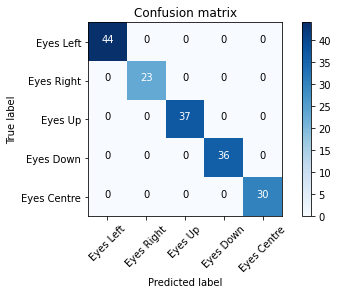

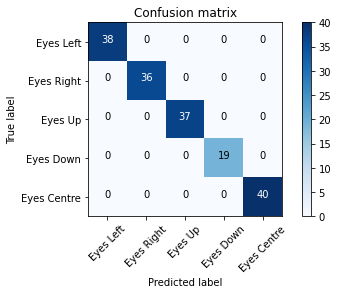

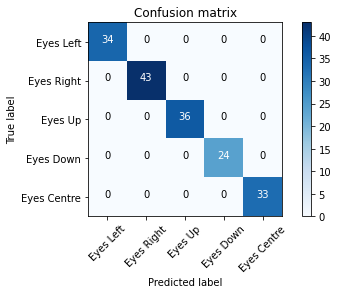

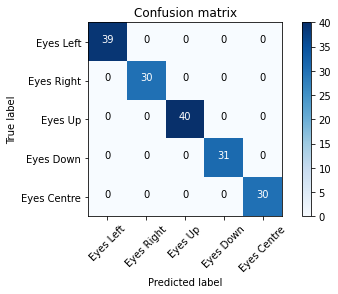

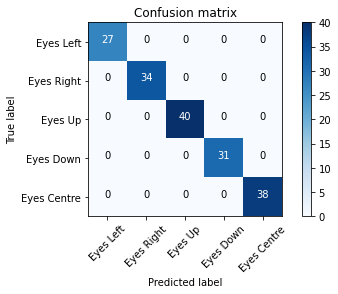

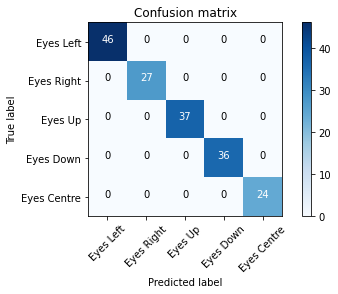

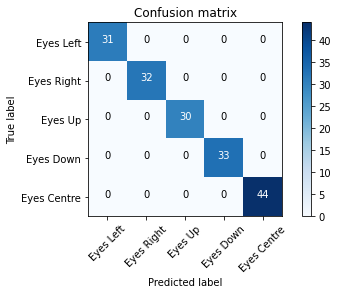

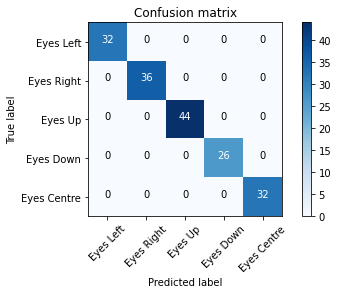

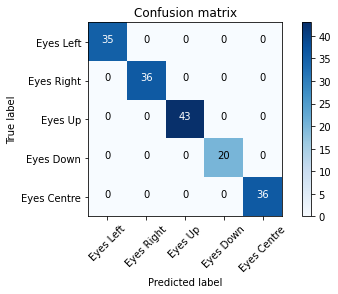

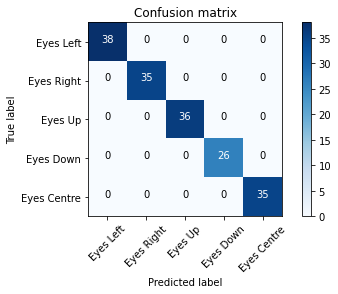

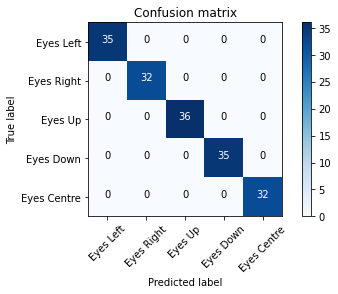

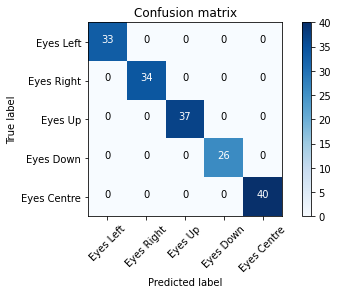

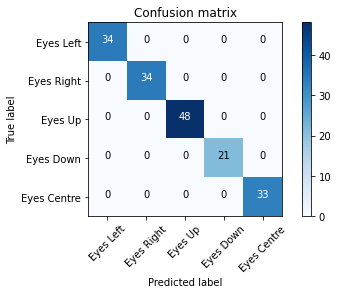

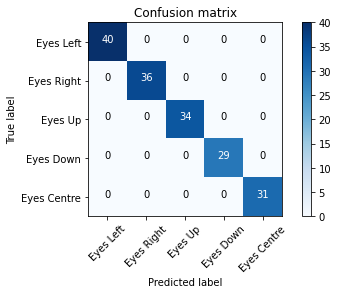

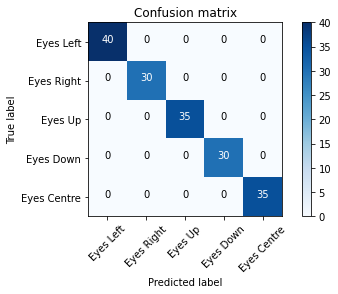

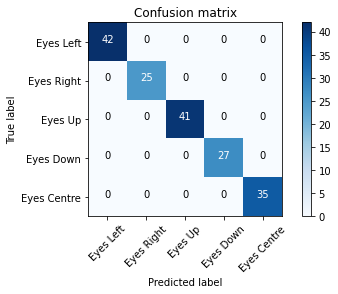

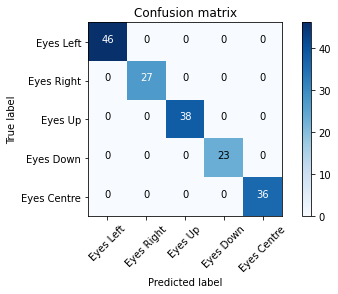

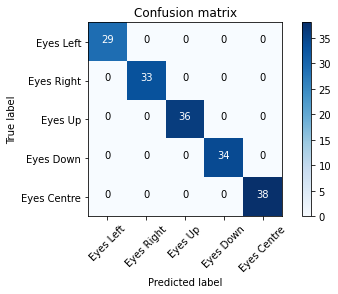

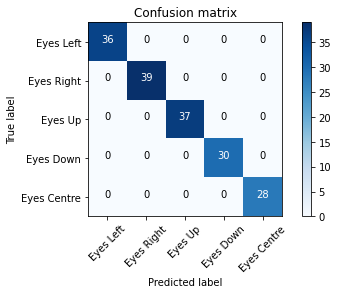

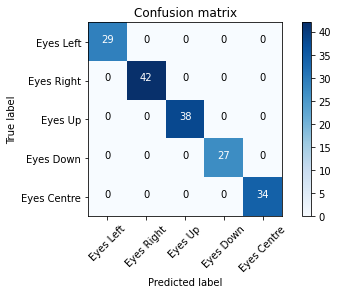

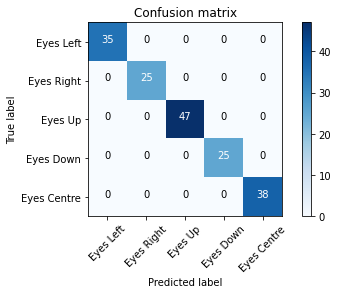

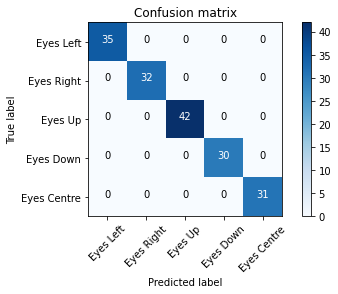

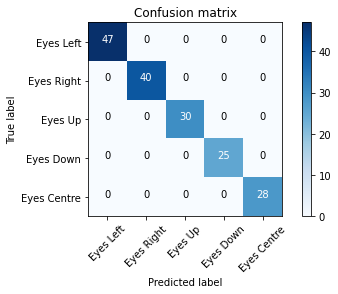

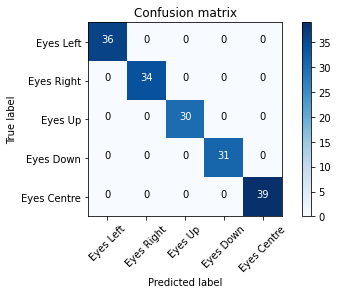

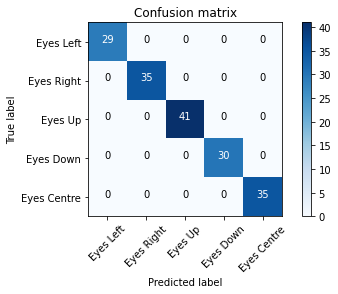

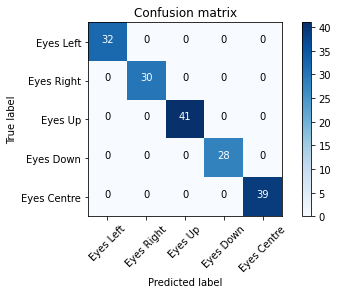

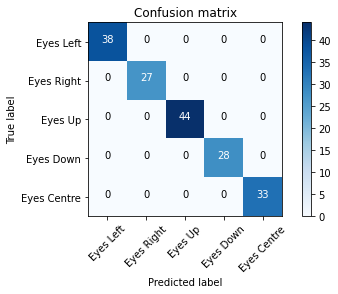

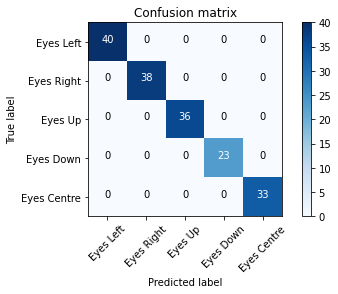

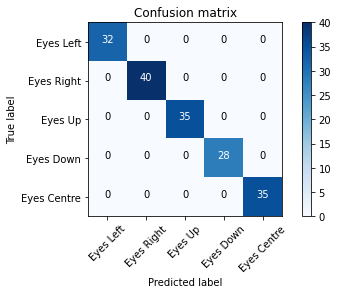

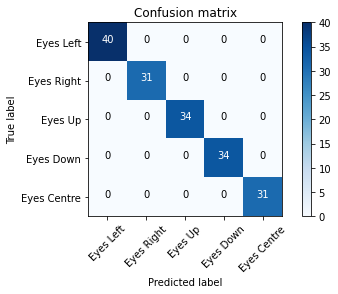

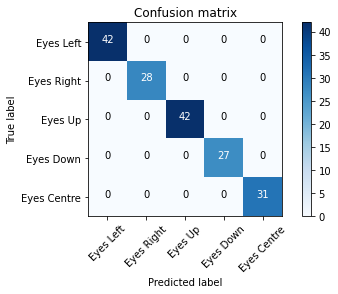

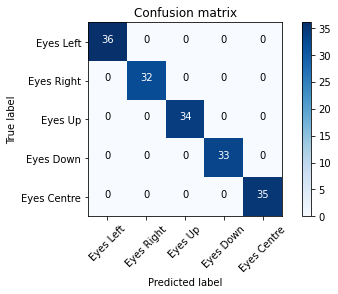

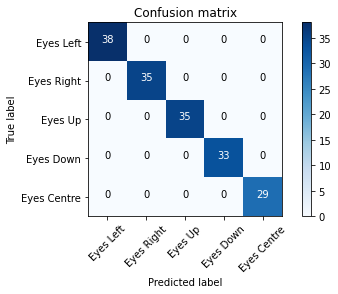

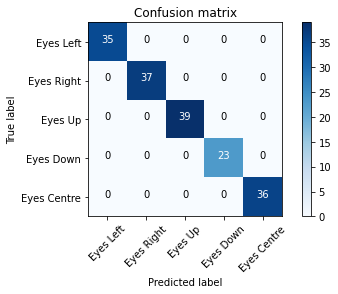

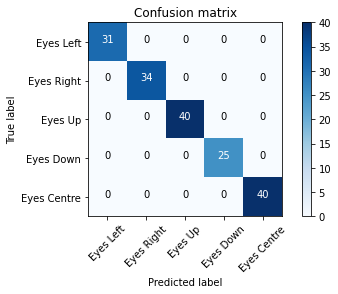

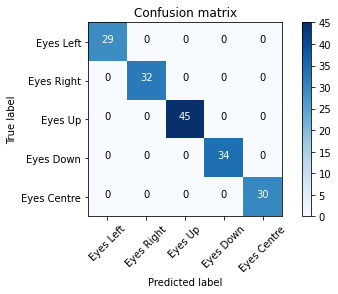

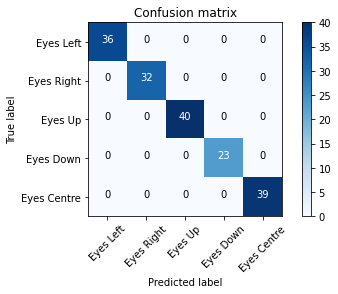

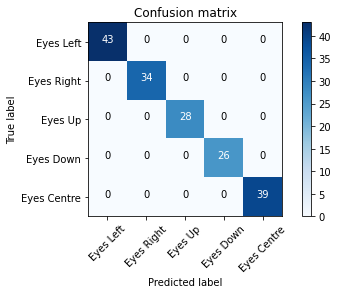

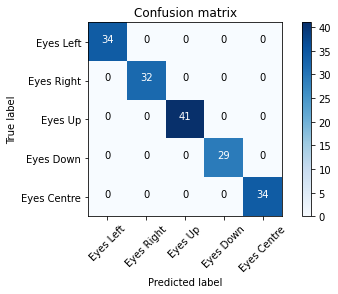

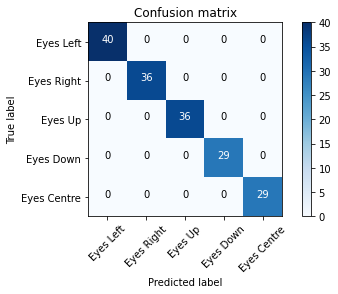

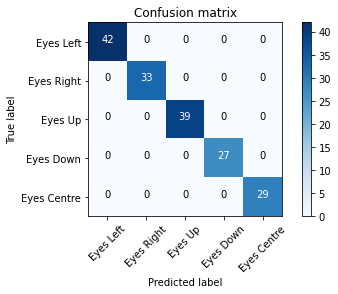

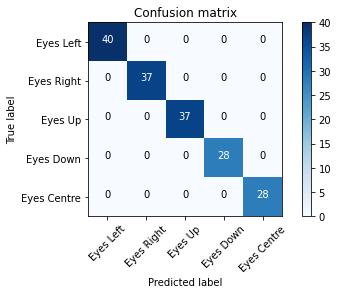

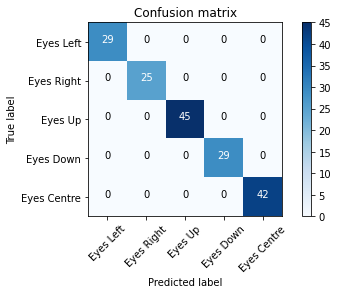

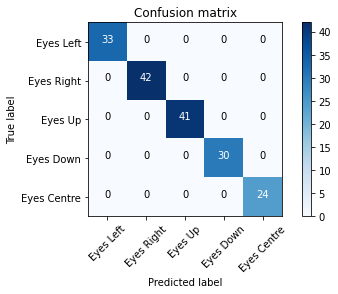

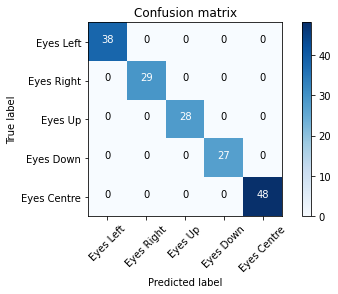

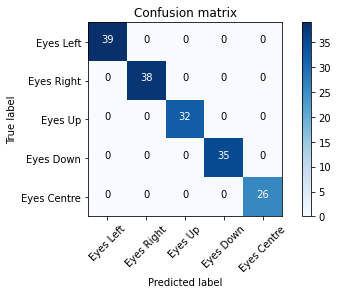

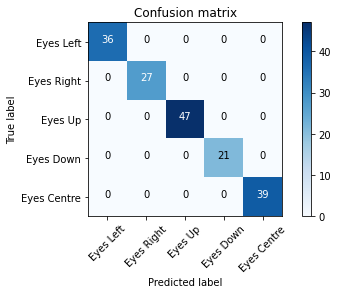

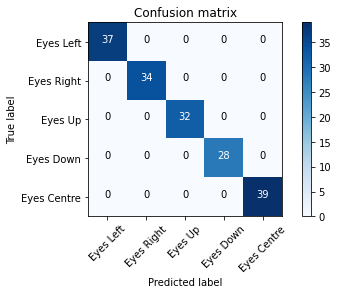

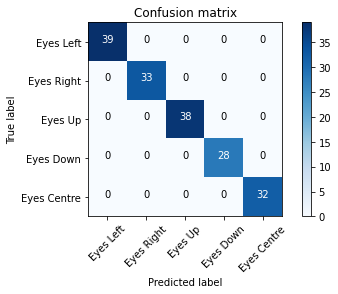

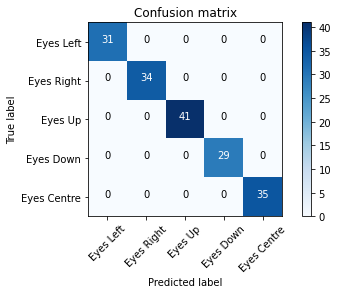

In [24]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


## LR Model

lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[31  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 46  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 30]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[36  0  0  0  0]
 [ 0 35  0  0  0]
 [ 0  0 36  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 39]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        26

   micro avg       1.00      1.00      1.00    

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        38

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[35  0  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 39  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 38]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        24

   micro avg       1.00      1.00      1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[39  0  0  0  0]
 [ 0 37  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 31]]
lr 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00    

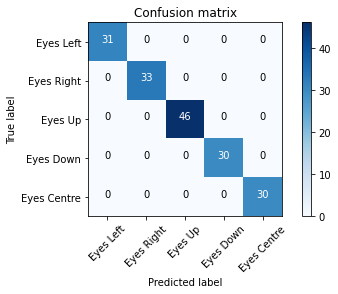

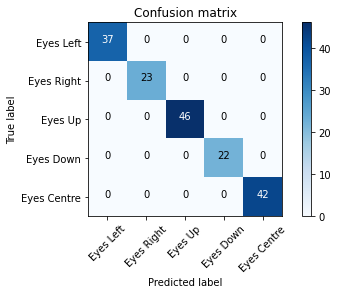

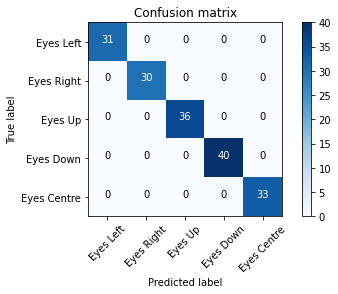

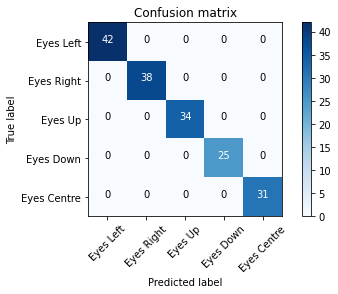

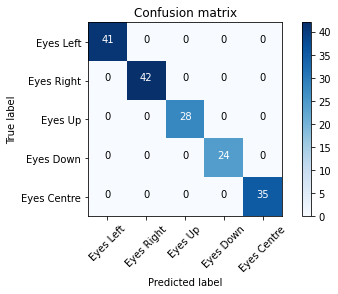

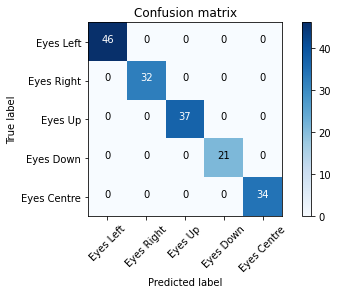

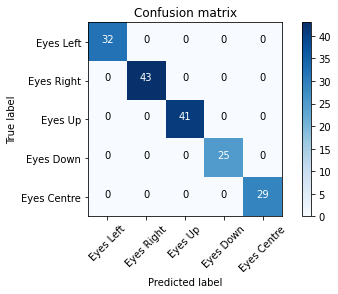

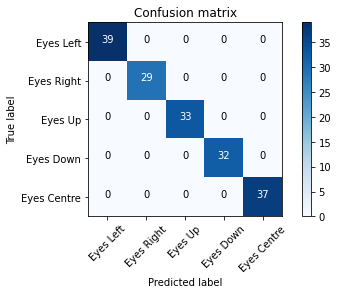

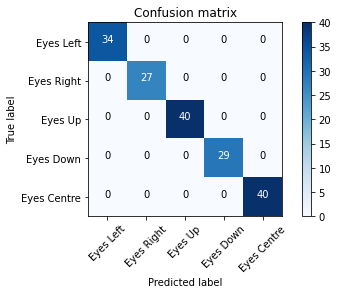

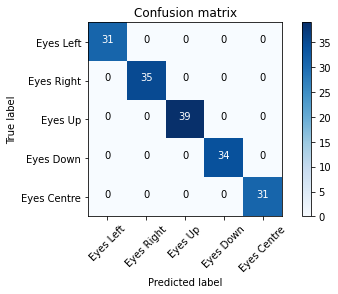

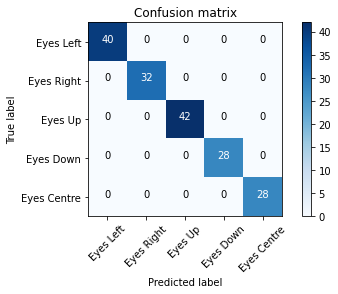

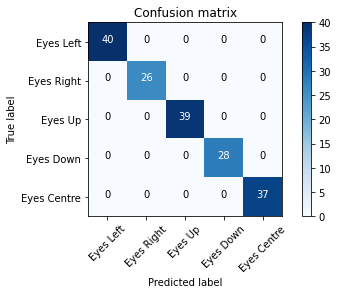

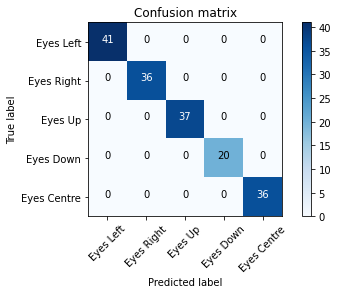

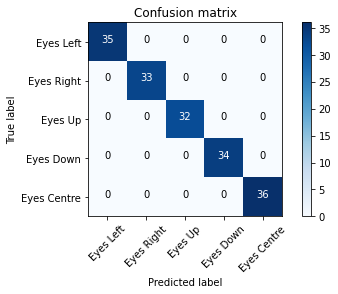

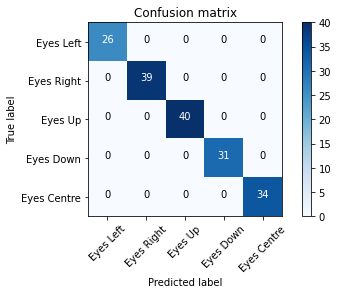

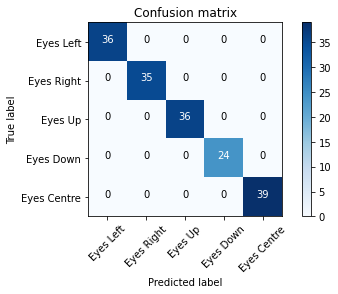

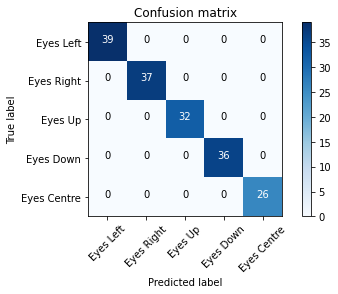

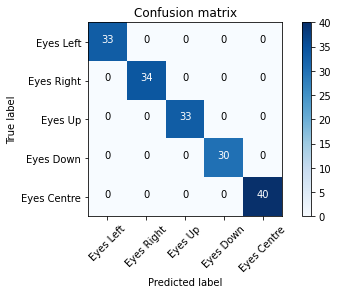

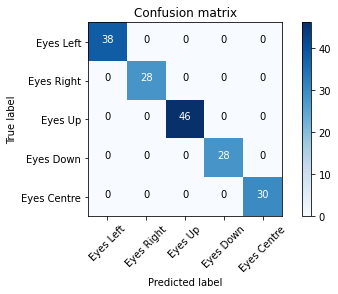

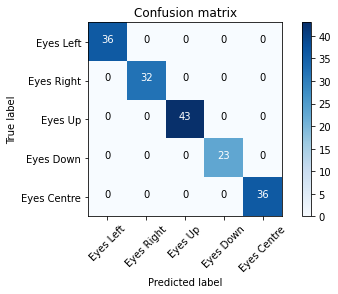

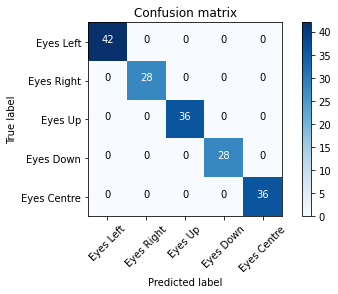

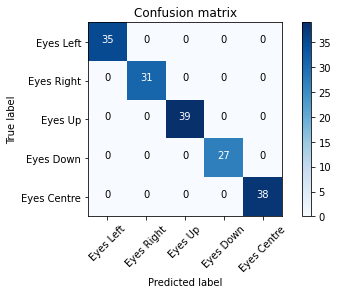

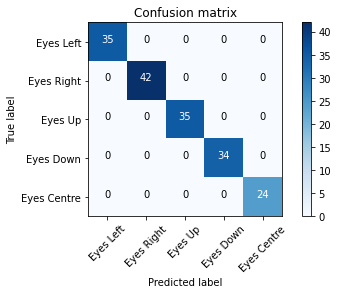

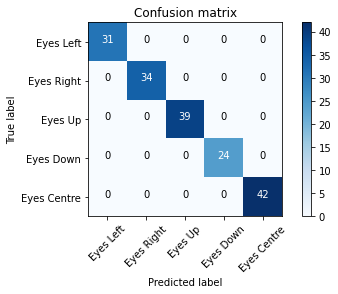

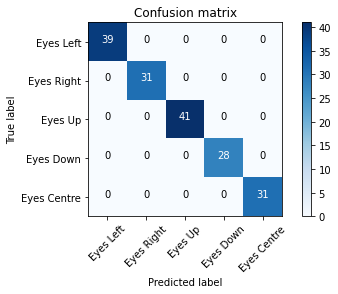

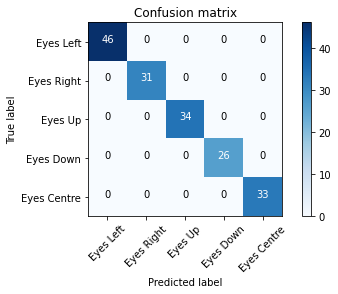

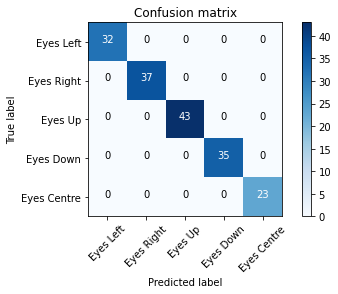

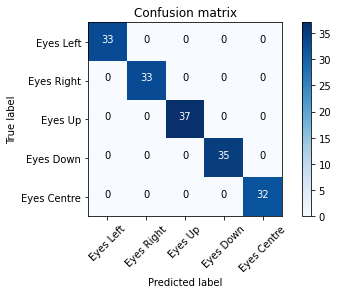

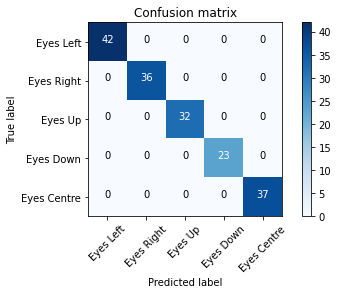

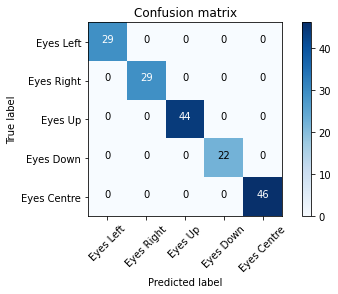

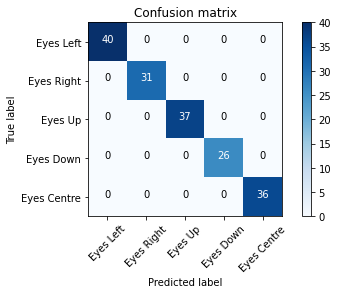

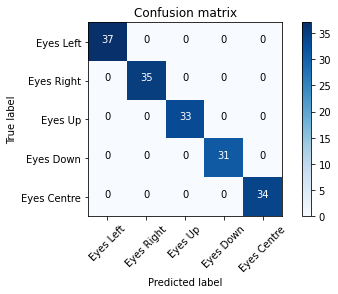

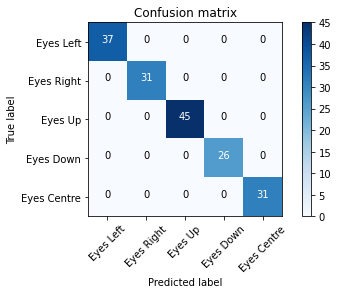

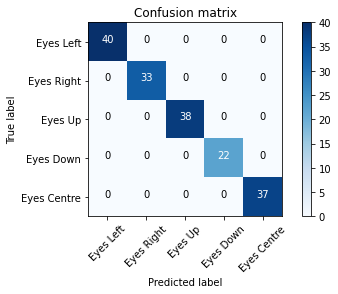

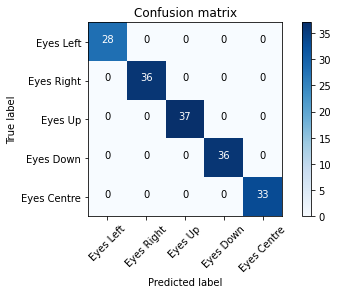

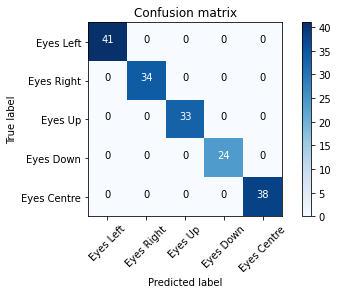

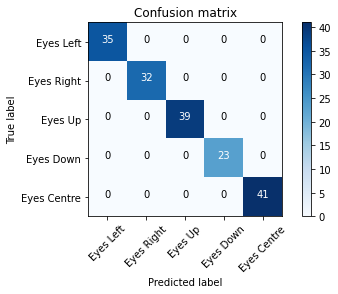

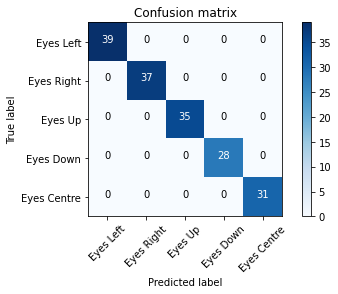

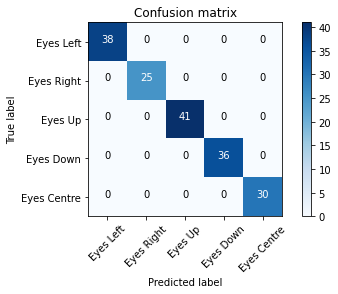

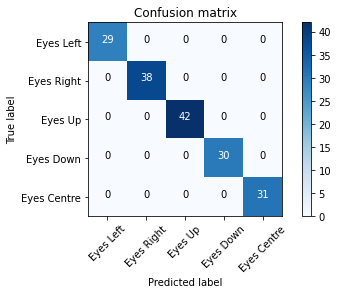

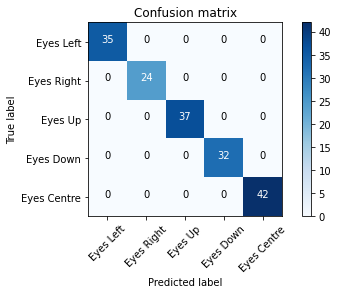

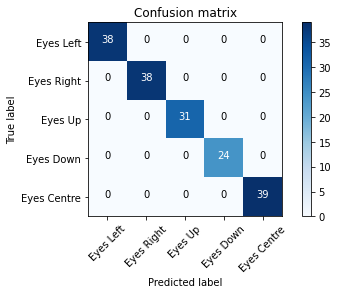

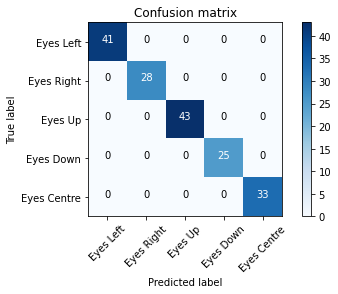

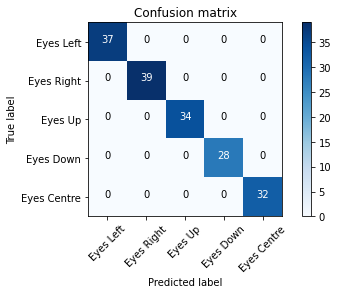

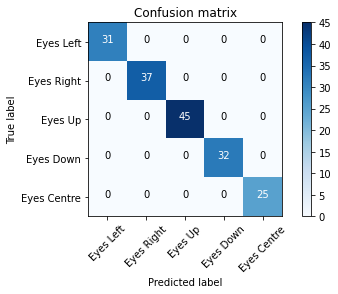

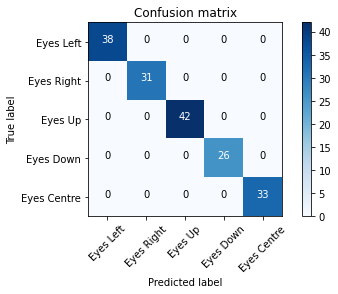

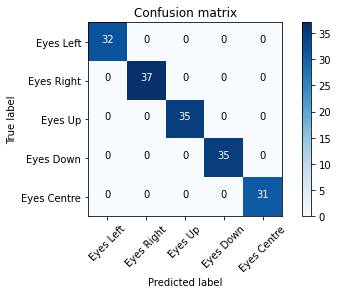

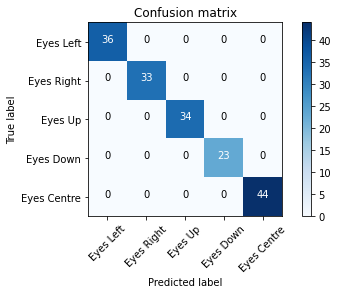

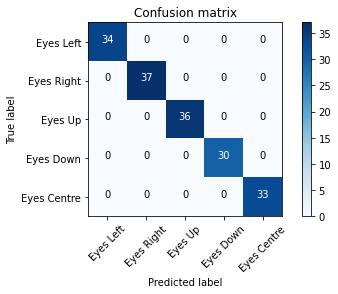

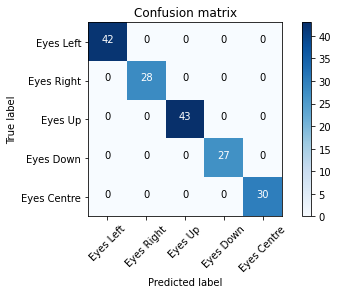

In [25]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in lr.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


## RF Model

rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        40

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[31  0  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 40]]
rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1

rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        29

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[38  0  0  0  0]
 [ 0 38  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 29]]
rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[36  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 37  0]
 [ 0  0  0  0 30]]
rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1

rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[44  0  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 35  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 35]]
rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1

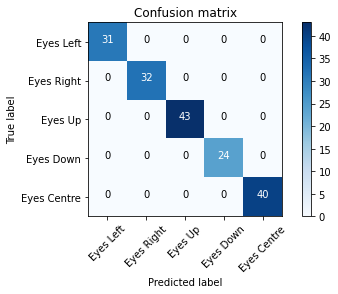

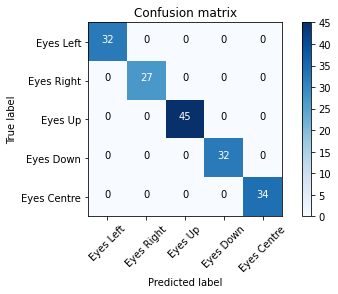

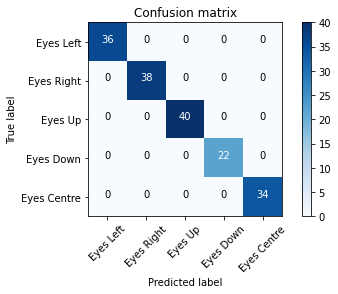

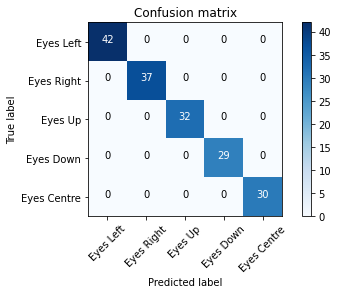

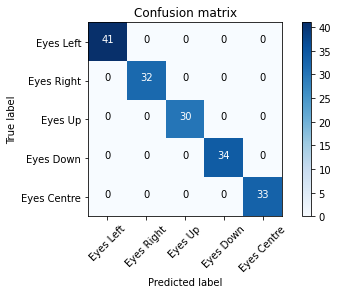

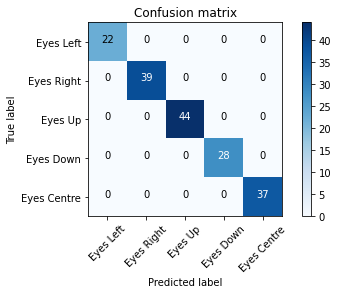

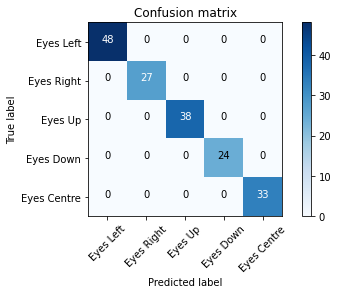

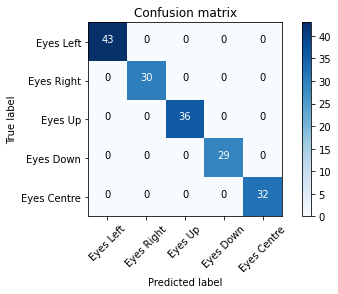

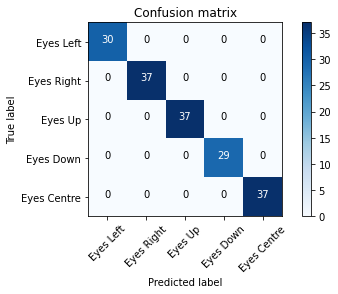

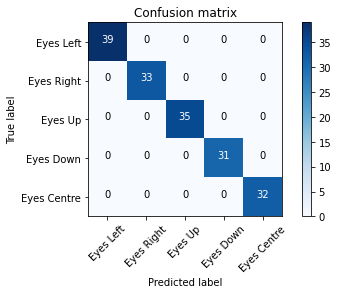

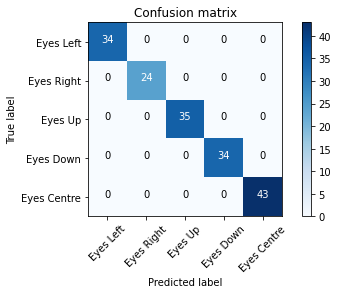

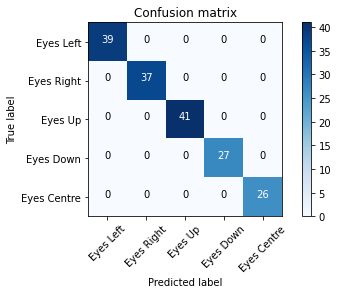

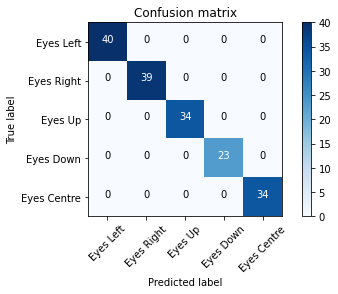

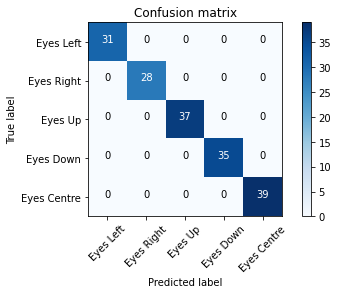

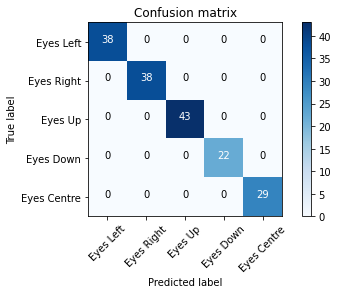

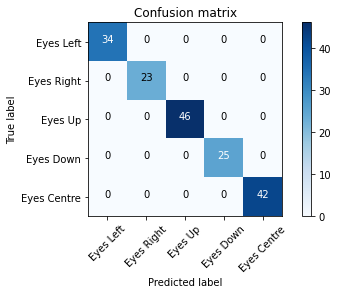

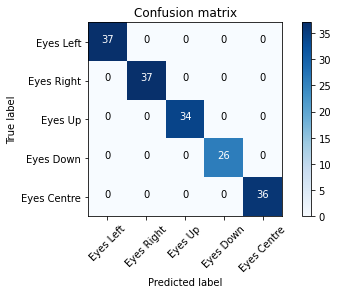

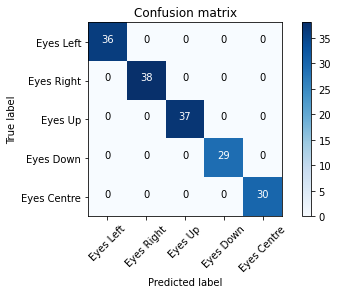

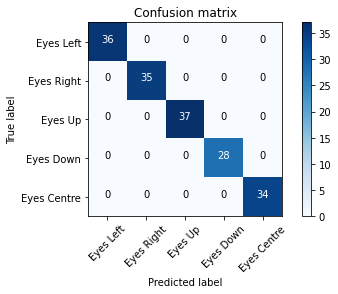

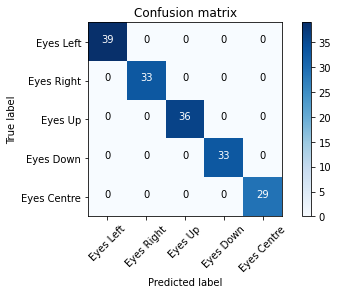

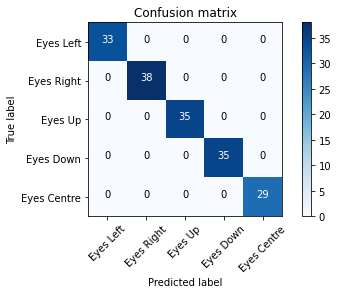

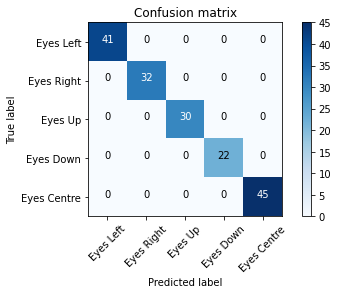

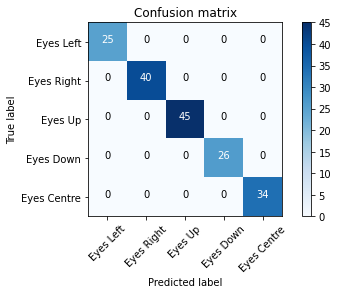

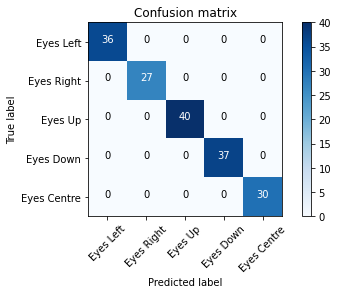

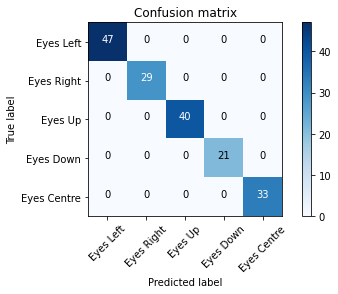

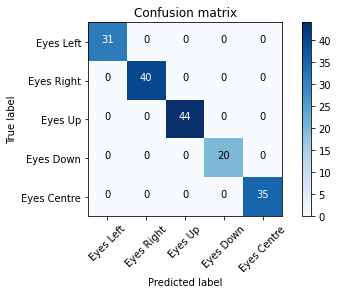

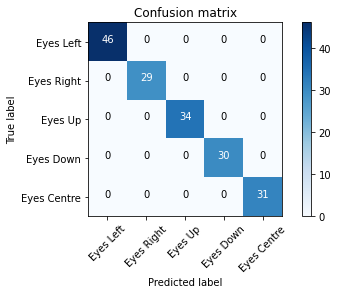

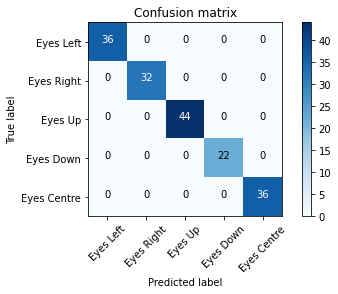

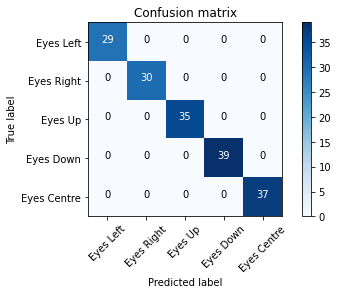

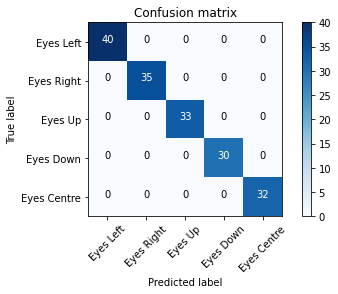

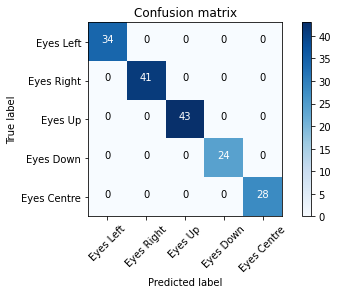

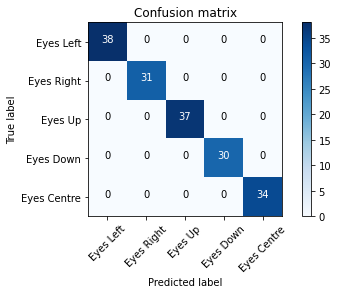

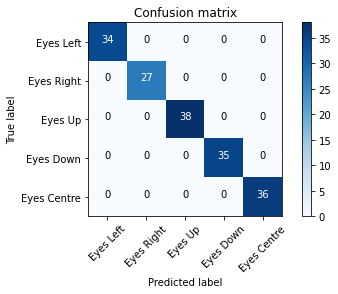

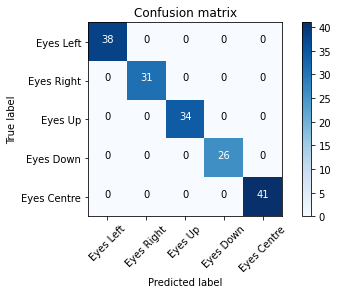

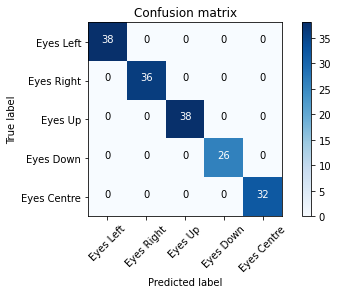

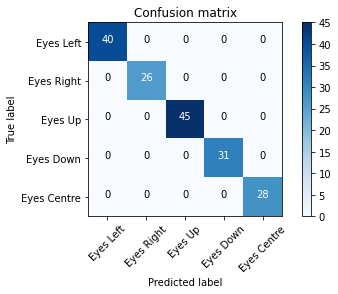

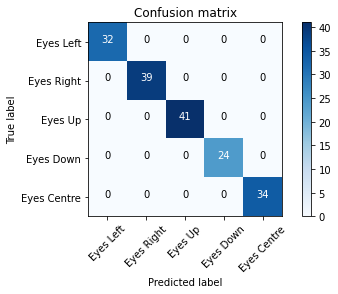

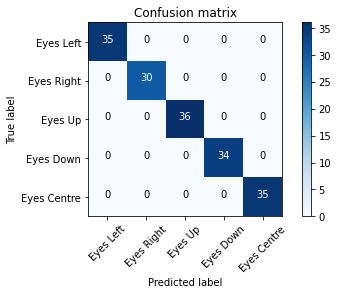

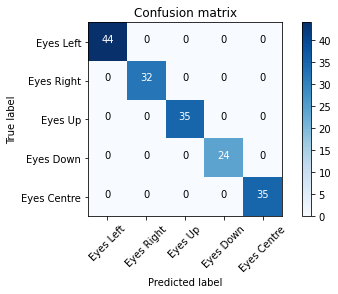

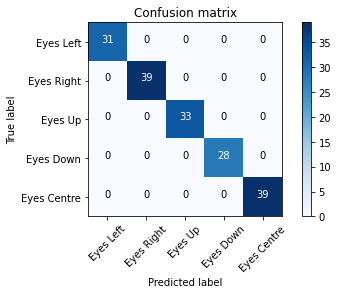

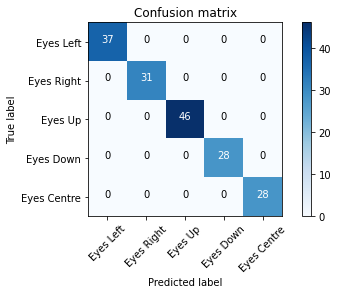

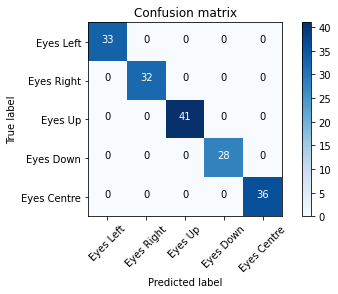

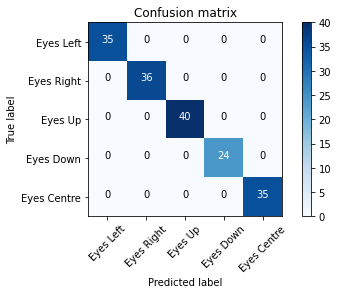

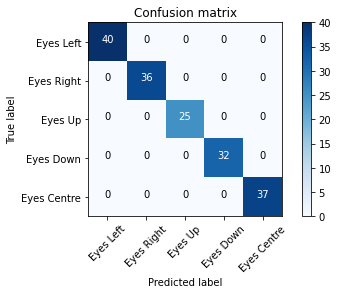

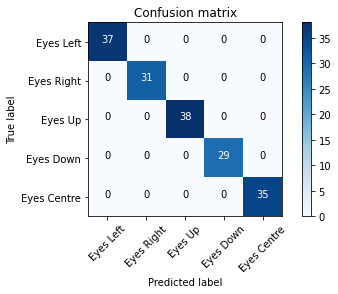

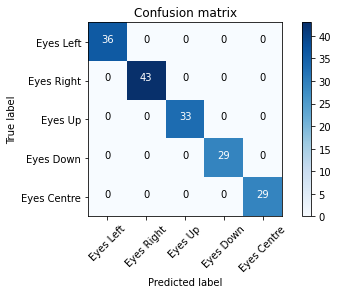

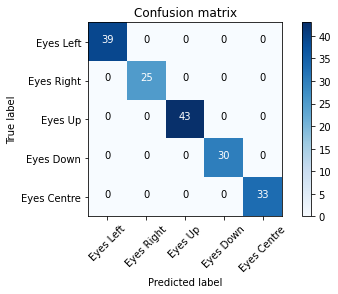

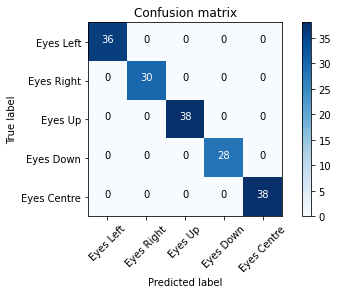

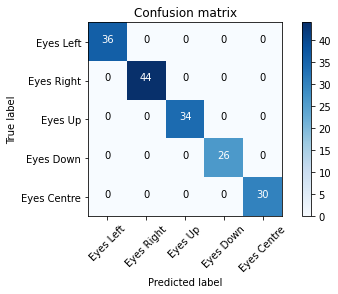

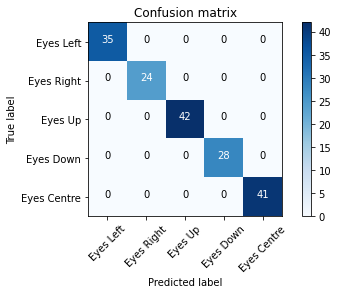

In [26]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rf.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


## RC Model

rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[40  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 36  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 35]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        36

   micro avg       1.00      1.00      1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        35

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[38  0  0  0  0]
 [ 0 41  0  0  0]
 [ 0  0 32  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 35]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00    

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[36  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 34]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        30

   micro avg       1.00      1.00      1.00    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix, without normalization
[[35  0  0  0  0]
 [ 0 30  0  0  0]
 [ 0  0 46  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 27]]
rc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        38

   micro avg       1.00      1.00      1.00    

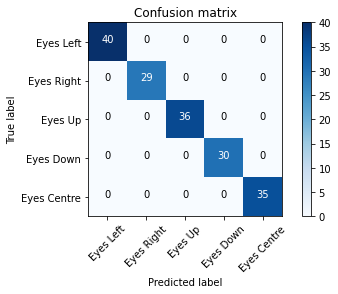

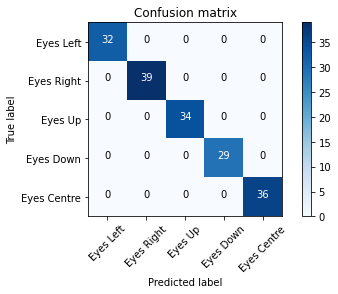

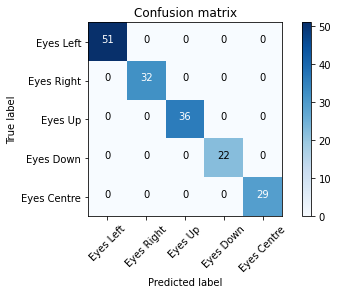

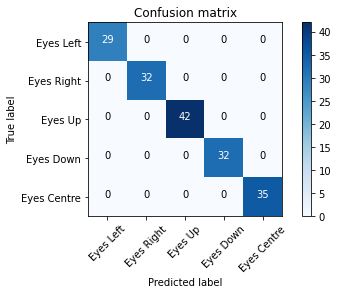

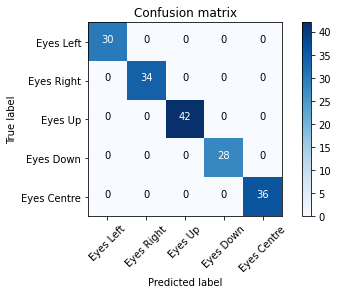

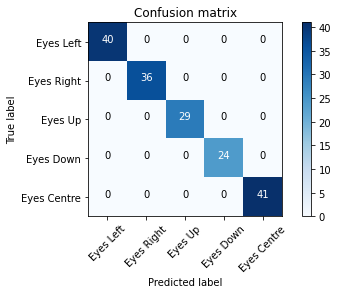

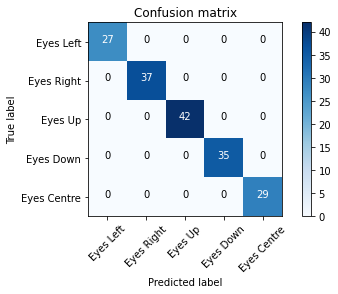

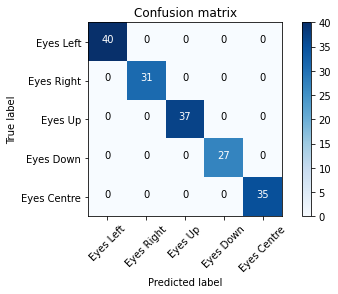

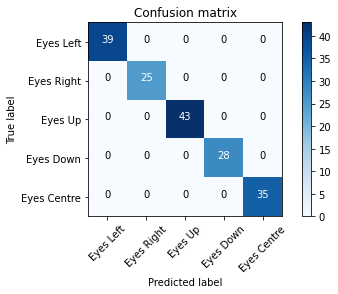

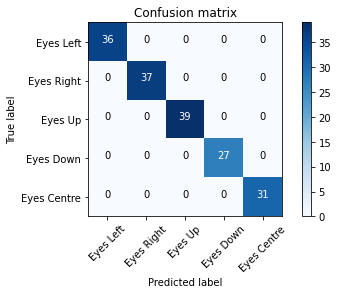

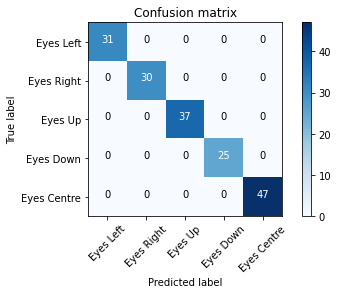

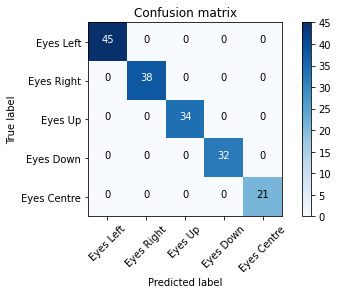

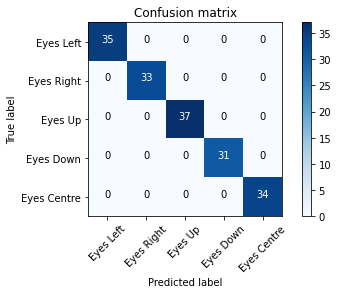

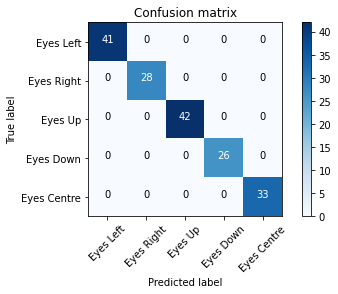

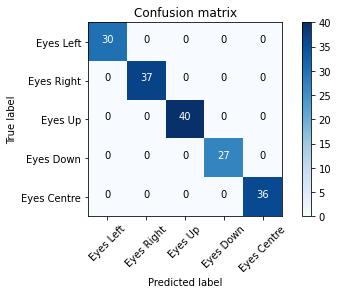

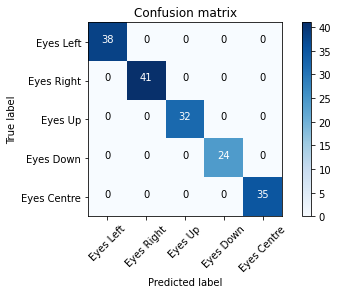

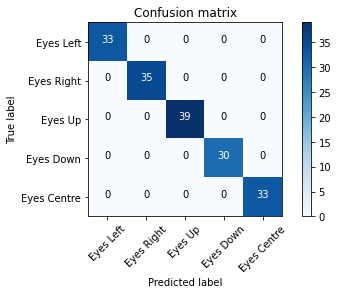

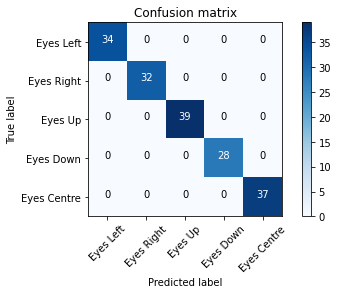

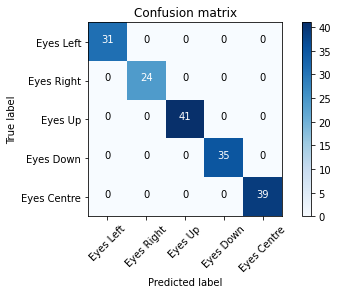

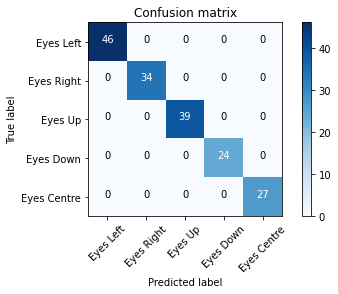

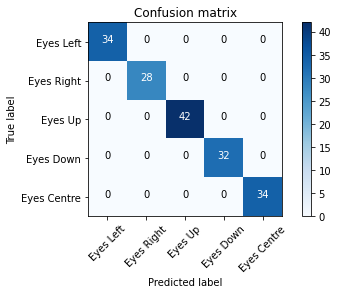

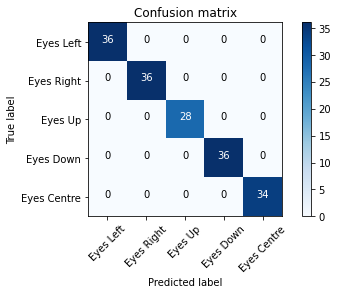

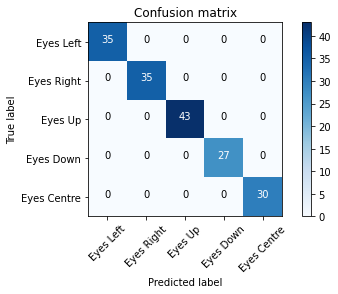

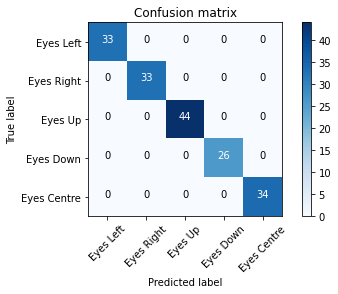

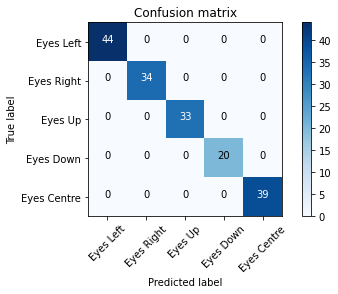

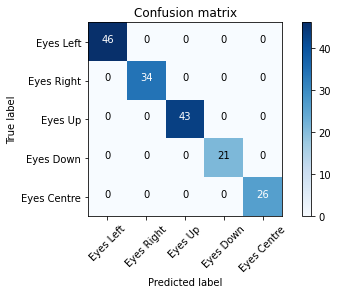

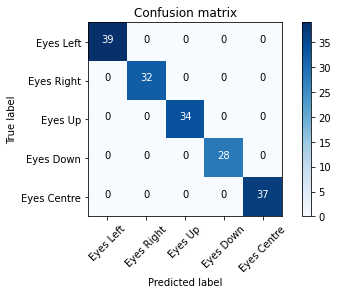

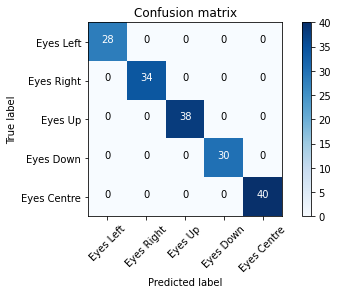

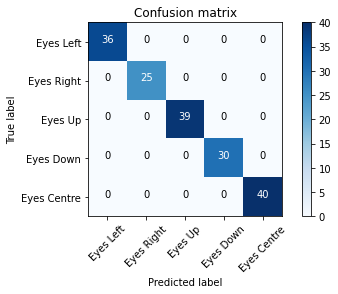

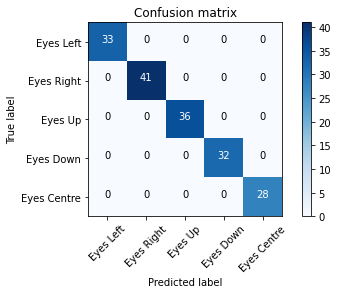

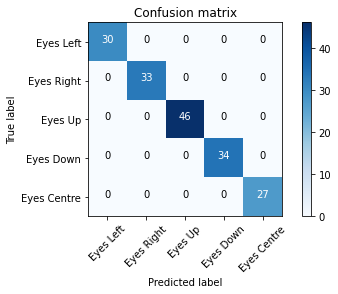

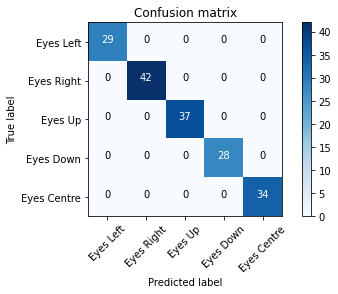

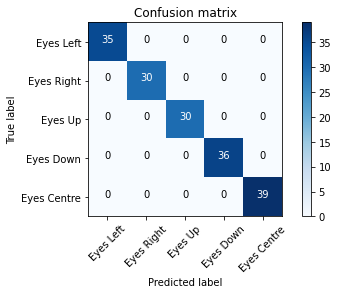

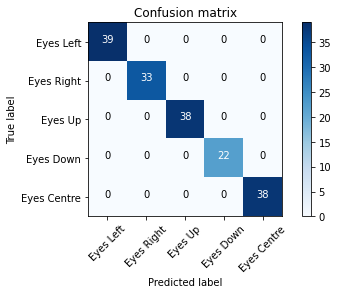

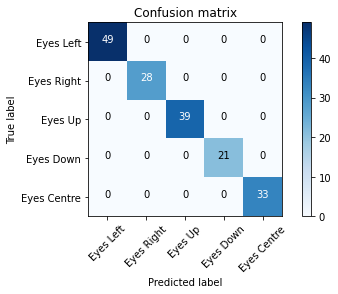

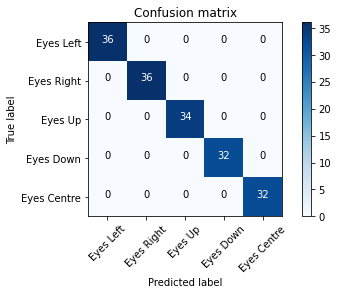

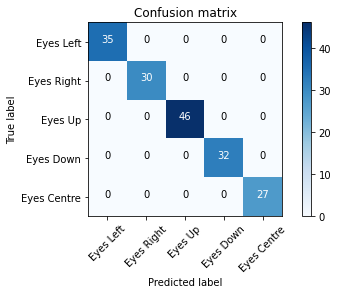

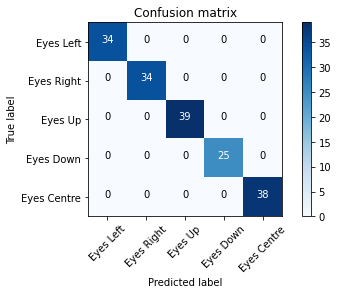

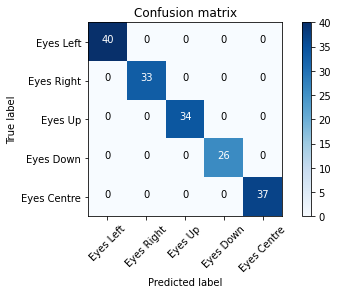

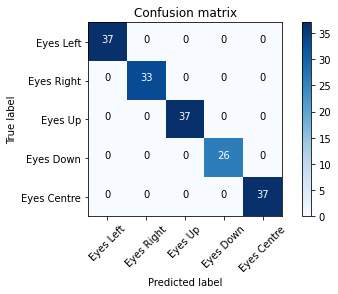

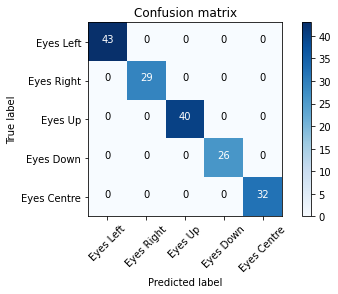

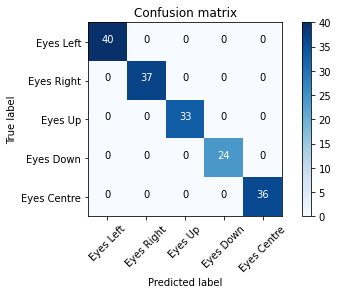

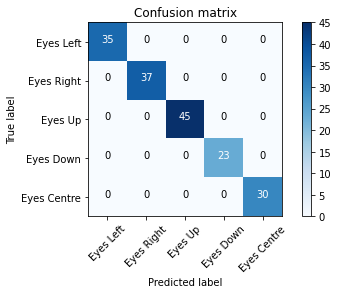

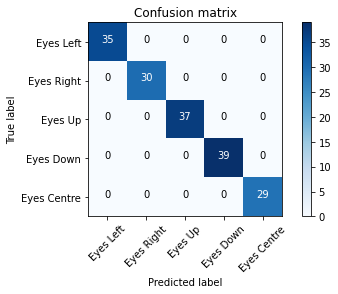

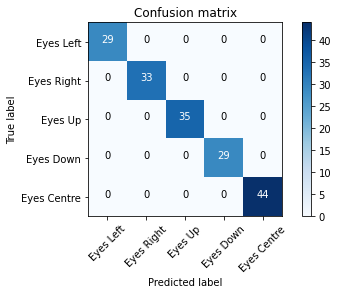

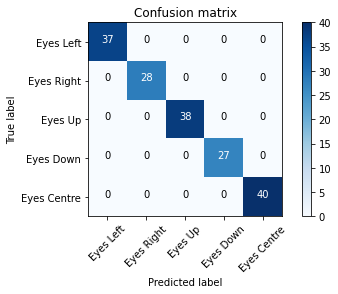

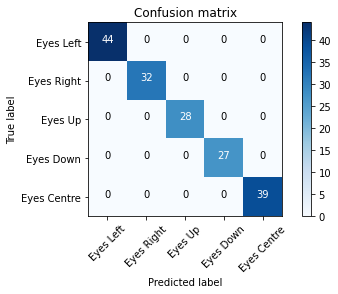

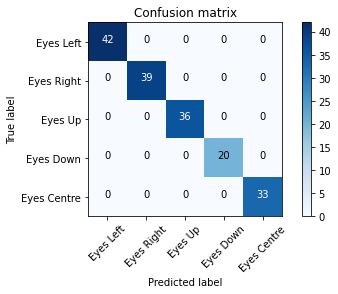

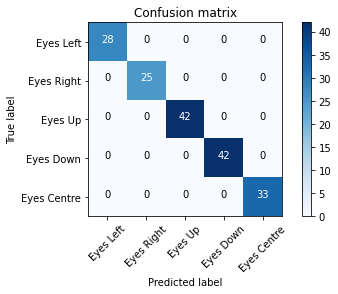

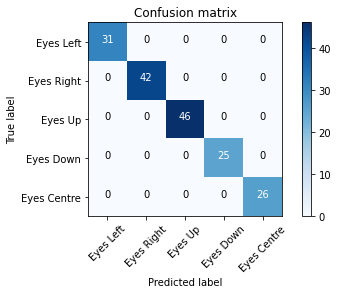

In [27]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rc.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Left','Eyes Right', 'Eyes Up', 'Eyes Down', 'Eyes Centre'],normalize= False,  title='Confusion matrix')


In [28]:
import pickle
with open('iris_model_16_2_5_gb_kfolds.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)